In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# os libraries
from pathlib import Path
import pickle
import os, glob

# Required Libraries

# Base Python Libraries
import json
import requests
import pandas as pd
import numpy as np
from tqdm import tqdm
import re
from collections import OrderedDict, Counter
import string
from ast import literal_eval

# Datetime utilities
import datetime
from datetime import date, timedelta
from dateutil.relativedelta import relativedelta
import calendar

#Visualizations
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker
import matplotlib.dates as mdates

#Natural Language Processing (NLP)

import spacy
import gensim
from spacy.tokenizer import Tokenizer
from gensim.corpora import Dictionary
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel
from sklearn.decomposition import LatentDirichletAllocation
from joblib import Parallel, delayed
from gensim.parsing.preprocessing import STOPWORDS as SW
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import re
import unicodedata
import nltk
import csv
import string
import gensim
!pip install sentence_transformers
from gensim.models import CoherenceModel
from pprint import pprint
from gensim import corpora
nltk.download('all')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 667.6 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 8.7 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=35cc44f262355995d883bb3715fe12fd9d6057b7845a0e0a1124bb11cd3257be
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence_transformers


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [3]:
!pip install demoji
import demoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 784.9 kB/s eta 0:00:00


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
senwave_japan = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Tweets_Brazil.csv')
print("Length of Senwave Japan Dataset = {}".format(len(senwave_japan)))

Length of Senwave Japan Dataset = 943913


<ipython-input-5-d19a8f21537d>:1: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  senwave_japan = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Tweets_Brazil.csv')


In [6]:
senwave_japan.drop(senwave_japan.columns[0], axis=1, inplace = True)

In [7]:
senwave_japan.head()

created_at                   id  \
0  Wed Dec 08 04:25:45 +0000 2021  1468436611977207808   
1  Wed Dec 08 04:26:20 +0000 2021  1468436761705594886   
2  Wed Dec 08 04:26:19 +0000 2021  1468436755678482435   
3  Wed Dec 08 04:26:34 +0000 2021  1468436817175322636   
4  Wed Dec 08 04:26:38 +0000 2021  1468436835328266240   

                                                text  \
0  RT @twinkyxstar: I miss travelling and going t...   
1  @aginnt Somebody decided Germany is special :\...   
2  RT @mkarolian: Jen Psaki somewhat mockingly as...   
3  @AntiVaxWatchOrg is one of America’s leading s...   
4  @merdersgf tbh priorities, we've been waiting ...   

                user_location  
0             Fantasy world 🌌  
1  Am Brennpunkt der Probleme  
2         Nova Scotia, Canada  
3             Alexandria, Va.  
4                      Panama

In [8]:
senwave_japan['created_at'] = pd.to_datetime(senwave_japan['created_at'],  errors = 'coerce')

In [9]:
# first_wave = senwave_japan[(senwave_japan['created_at'] >= '2020-04-01') & (senwave_japan['created_at'] <= '2021-01-31')].head(30000)
# second_wave = senwave_japan[(senwave_japan['created_at'] >= '2021-03-01') & (senwave_japan['created_at'] < '2021-06-30')].head(30000)
# third_wave = senwave_japan[(senwave_japan['created_at'] >= '2022-01-01') & (senwave_japan['created_at'] < '2022-02-28')].head(30000)

In [10]:
# senwave_japan = pd.concat([first_wave, second_wave, third_wave])

print(senwave_japan.shape)

senwave_japan.head()

(943913, 4)


created_at                   id  \
0 2021-12-08 04:25:45+00:00  1468436611977207808   
1 2021-12-08 04:26:20+00:00  1468436761705594886   
2 2021-12-08 04:26:19+00:00  1468436755678482435   
3 2021-12-08 04:26:34+00:00  1468436817175322636   
4 2021-12-08 04:26:38+00:00  1468436835328266240   

                                                text  \
0  RT @twinkyxstar: I miss travelling and going t...   
1  @aginnt Somebody decided Germany is special :\...   
2  RT @mkarolian: Jen Psaki somewhat mockingly as...   
3  @AntiVaxWatchOrg is one of America’s leading s...   
4  @merdersgf tbh priorities, we've been waiting ...   

                user_location  
0             Fantasy world 🌌  
1  Am Brennpunkt der Probleme  
2         Nova Scotia, Canada  
3             Alexandria, Va.  
4                      Panama

In [11]:
def clean(text):
    wnl = nltk.stem.WordNetLemmatizer()
    StopWords = stopwords.words('english') + ['t', 'rt', 'ti', 'vk', 'to', 'co','dqlw', 'z', 'e', 'nd', 'm', 's', 'kur', 'u', 'o', 'd', 'http', 'https']
    text = (unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore').lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in StopWords]

In [12]:
senwave_japan = senwave_japan[senwave_japan['user_location'].str.contains('Brazil|Acre|Rio Branco|Alagoas|Maceió|União dos Palmares|Amapá|Macapá|Amazonas|Itacoatiara|Manaus|Tefé|Bahia|Alagoinhas|Feira de Santana|Ilhéus|Itabuna|Jequié|Juazeiro|Paulo Afonso|Salvador|Vitória da Conquista|Ceará|Aracati|Crato|Fortaleza|Juazeiro do Norte|Sobral|Distrito Federal|Brasília|Espírito Santo|Cachoeiro de Itapemirim|Colatina|Fundão|Vila Velha|Vitória|Goiás|Anápolis|Catalão|Goiânia|Goiás|Ipameri|Jataí|Maranhão|Alcântara|Caxias|São Luís|Mato Grosso|Cuiabá|Mato Grosso do Sul|Campo Grande|Corumbá|Três Lagoas|Minas Gerais|Araguari|Barbacena|Belo Horizonte|Congonhas|Conselheiro Lafaiete|Diamantina|Divinópolis|Governador Valadares|Juiz de Fora|Mariana|Montes Claros|Nova Lima|Ouro Prêto|Passos|Patos de Minas|Poços de Caldas|Sabará|São João del Rei|Sete Lagoas|Teófilo Otoni|Uberaba|Uberlândia|Pará|Belém|Bragança|Monte Alegre|Óbidos|Santarém|Campina Grande|Paraíba|Campina Grande|João Pessoa|Paraná|Curitiba|Londrina|Maringá|Paranaguá|Ponta Grossa|Pernambuco|Caruaru|Garanhuns|Jaboatão|Olinda|Petrolândia|Petrolina|Recife|Piauí|Floriano|Parnaíba|Teresina|Rio de Janeiro|Angra dos Reis|Barra Mansa|Campos dos Goytacazes|Copacabana|Duque de Caxias|Nilópolis|Niterói|Nova Friburgo|Nova Iguaçu|Petrópolis|Resende|Rio de Janeiro|São Gonçalo|São João de Meriti|Teresópolis|Volta Redonda|Rio Grande do Norte|Mossoró|Natal|Rio Grande do Sul|Bagé|Bento Gonçalves|Canoas|Caxias do Sul|Novo Hamburgo|Passo Fundo|Pelotas|Porto Alegre|Rio Grande|Santa Maria|São Leopoldo|Uruguaiana|Rondônia|Guajará-Mirim|Pôrto Velho|Roraima|Boa Vista|Santa Catarina|Blumenau|Criciúma|Florianópolis|Itajaí|Lajes|Tubarão|São Paulo|Americana|Araçatuba|Araraquara|Barretos|Bauru|Botucatu|Campinas|Catanduva|Cubatão|Franca|Guaratinguetá|Guarujá|Guarulhos|Itapetininga|Jacareí|Jaú|Jundiaí|Limeira|Marília|Mogi das Cruzes|Osasco|Ourinhos|Piracicaba|Presidente Prudente|Ribeirão Prêto|Rio Claro|Santo André|Santos|São Bernardo do Campo|São Caetano do Sul|São Carlos|São José do Rio Prêto|São José dos Campos|São Paulo|São Vicente|Sorocaba|Taubaté|Sergipe|Aracaju|São Cristóvão|Tocantins|Palmas')==True]

In [13]:
senwave_japan

created_at                   id  \
13     2021-12-08 04:29:07+00:00  1468437459381927938   
18     2021-12-08 04:31:36+00:00  1468438084400394241   
21     2021-12-08 04:32:42+00:00  1468438361954209798   
32     2021-12-08 04:35:39+00:00  1468439105847668736   
33     2021-12-08 04:35:59+00:00  1468439186642378756   
...                          ...                  ...   
943882 2020-08-21 22:48:40+00:00  1296942321846693891   
943883 2020-08-21 22:48:42+00:00  1296942332235911169   
943888 2020-08-21 22:49:07+00:00  1296942434832850945   
943910 2020-08-21 22:50:49+00:00  1296942864358940674   
943912 2020-08-21 22:51:01+00:00  1296942913247744000   

                                                     text  \
13      RT @marmotihe: We need this new evidence brief...   
18      RT @zhusu: Nobody is talking about this bc the...   
21      RT @RagnarokRob: Probably through the southern...   
32      RT @aginnt: Over 40,000 Austrians protested in...   
33      RT @MattsIdeaShop: I don’t know if any of you ...   
...                                                   ...   
943882  RT @ABsteward: "Patients randomized to a 5-day...   
943883  RT @3M: From its start, we have been helping i...   
943888  RT @PrisonPlanet: The Governor of Maine has or...   
943910  RT @DrTedros: Thank you, #BTS for the upliftin...   
943912  RT @dwnews: The rise of coronavirus infections...   

                             user_location  
13                  Rio de Janeiro, Brasil  
18                  Belo Horizonte, Brasil  
21                             El Salvador  
32                  Rio de Janeiro, Brazil  
33           Btwn Red & Rio Grande, Tejas   
...                                    ...  
943882  Las Palmas de Gran Canaria, España  
943883                         El Salvador  
943888                   São Paulo, Brasil  
943910                              Brazil  
943912                   Belo Horizonte-MG  

[194596 rows x 4 columns]

In [14]:
words = clean(''.join(str(senwave_japan['text'].tolist())))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '(exclusive, fmr)'),
  Text(0, 1, '(ensure, prope)'),
  Text(0, 2, '(camanpour, exclusive)'),
  Text(0, 3, '(tell, urging)'),
  Text(0, 4, '(lulaoficial, tell)'),
  Text(0, 5, '(urging, president)'),
  Text(0, 6, '(meeting, ensure)'),
  Text(0, 7, '(president, lulaoficial)'),
  Text(0, 8, '(call, g20)'),
  Text(0, 9, '(biden, call)'),
  Text(0, 10, '(g20, meeting)'),
  Text(0, 11, '(president, biden)'),
  Text(0, 12, '(brazilian, president)'),
  Text(0, 13, '(covid, vaccine)'),
  Text(0, 14, '(covid19, vaccine)')])

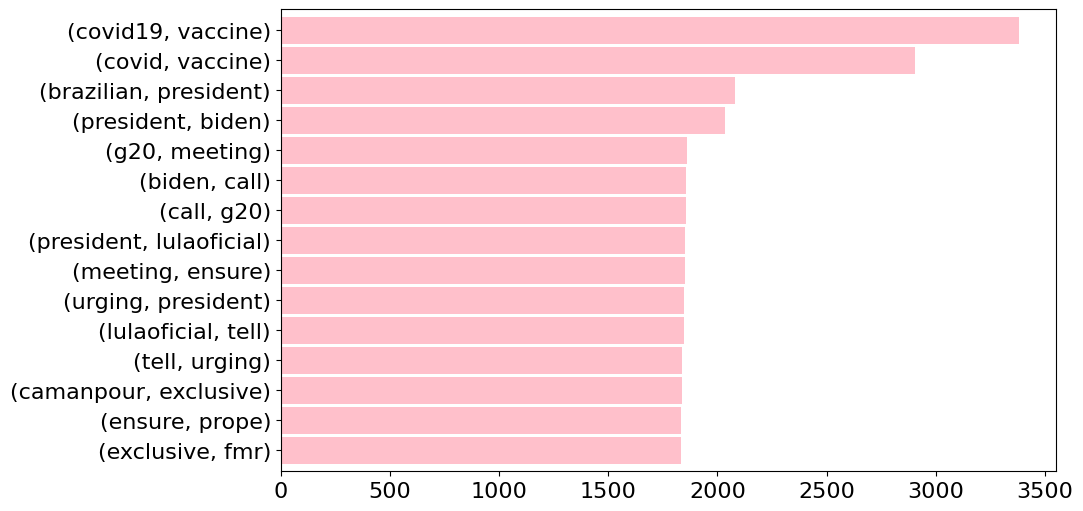

In [15]:
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:15]
trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:15]

bigrams_series.sort_values().plot.barh(color = 'pink', width = 0.9, figsize = (10, 6))
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '(berniespofforth, tell, someone)'),
  Text(0, 1, '(vacina, nlockdown, vacina)'),
  Text(0, 2, '(exclusive, fmr, brazilian)'),
  Text(0, 3, '(fmr, brazilian, president)'),
  Text(0, 4, '(meeting, ensure, prope)'),
  Text(0, 5, '(camanpour, exclusive, fmr)'),
  Text(0, 6, '(lulaoficial, tell, urging)'),
  Text(0, 7, '(brazilian, president, lulaoficial)'),
  Text(0, 8, '(tell, urging, president)'),
  Text(0, 9, '(biden, call, g20)'),
  Text(0, 10, '(urging, president, biden)'),
  Text(0, 11, '(president, lulaoficial, tell)'),
  Text(0, 12, '(president, biden, call)'),
  Text(0, 13, '(call, g20, meeting)'),
  Text(0, 14, '(g20, meeting, ensure)')])

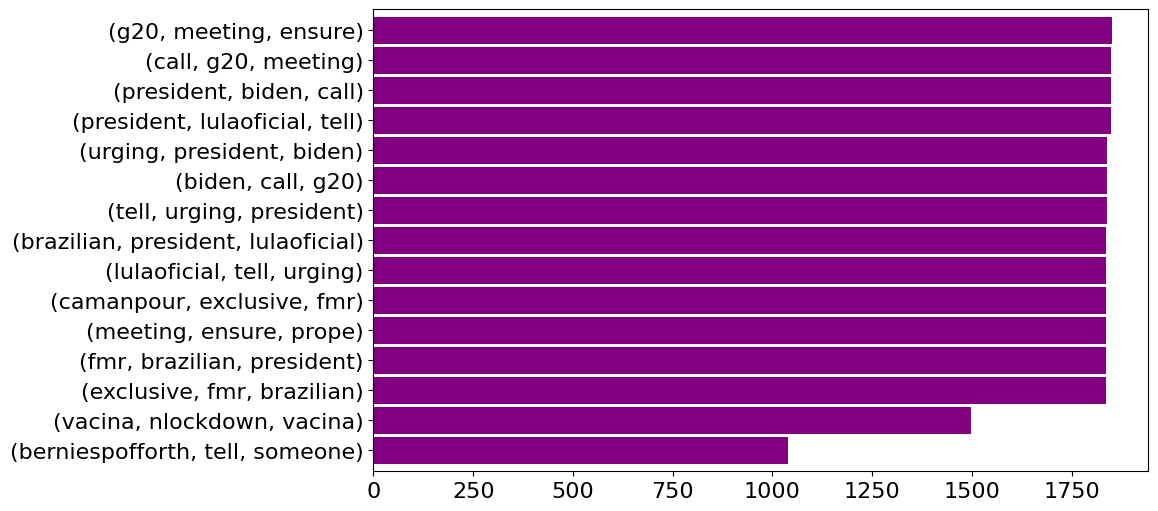

In [16]:
trigrams_series.sort_values().plot.barh(color = 'purple', width = 0.9, figsize = (10, 6))
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

In [17]:
contractions = {
"ain't": "am not", "aren't": "are not", "can't": "cannot", "can't've": "cannot have", "'cause": "because", "could've": "could have", "couldn't": "could not",
"couldn't've": "could not have", "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hadn't've": "had not have",
"hasn't": "has not", "haven't": "have not", "he'd": "he had", "he'd've": "he would have", "he'll": "he will", "he'll've": "he will have", "he's": "he is",
"how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is", "i'd": "i would", "i'd've": "i would have",
"i'll": "i will", "i'll've": "i will have", "i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
"it'd've": "it would have", "it'll": "it will", "it'll've": "it will have", "it's": "it is", "let's": "let us",
"ma'am": "madam", "mayn't": "may not", "might've": "might have", "mightn't": "might not", "mightn't've": "might not have", "must've": "must have", "mustn't": "must not",
"mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have", "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have",
"shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she shall / she will",
"she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have",
"so've": "so have", "so's": "so is", "that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
"there'd've": "there would have", "there's": "there is", "they'd": "they would", "they'd've": "they would have", "they'll": "they will",
"they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would",
"we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will",
"what'll've": "what will have", "what're": "what are", "what's": "what is", "what've": "what have", "when's": "when is",
"when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have",
"who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
"would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would", "y'all'd've": "you all would have",
"y'all're": "you all are", "y'all've": "you all have", "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
"you're": "you are", "you've": "you have"
}

In [18]:
contractionsWithAnotherInvertedComma = {
"ain’t": "am not", "aren’t": "are not", "can’t": "cannot", "can’t’ve": "cannot have", "’cause": "because", "could’ve": "could have", "couldn’t": "could not",
"couldn’t’ve": "could not have", "didn’t": "did not", "doesn’t": "does not", "don’t": "do not", "hadn’t": "had not", "hadn’t’ve": "had not have",
"hasn’t": "has not", "haven’t": "have not", "he’d": "he had", "he’d’ve": "he would have", "he’ll": "he will", "he’ll’ve": "he will have", "he’s": "he is",
"how’d": "how did", "how’d’y": "how do you", "how’ll": "how will", "how’s": "how is", "i’d": "i would", "i’d’ve": "i would have",
"i’ll": "i will", "i’ll’ve": "i will have", "i’m": "i am", "i’ve": "i have", "isn’t": "is not", "it’d": "it would",
"it’d’ve": "it would have", "it’ll": "it will", "it’ll’ve": "it will have", "it’s": "it is", "let’s": "let us",
"ma’am": "madam", "mayn’t": "may not", "might’ve": "might have", "mightn’t": "might not", "mightn’t’ve": "might not have", "must’ve": "must have", "mustn’t": "must not",
"mustn’t’ve": "must not have", "needn’t": "need not", "needn’t’ve": "need not have", "o’clock": "of the clock", "oughtn’t": "ought not", "oughtn’t’ve": "ought not have",
"shan’t": "shall not", "shan’t’ve": "shall not have", "she’d": "she would", "she’d’ve": "she would have", "she’ll": "she will",
"she’ll’ve": "she will have", "she’s": "she is", "should’ve": "should have", "shouldn’t": "should not", "shouldn’t’ve": "should not have",
"so’ve": "so have", "so’s": "so is", "that’d": "that would", "that’d’ve": "that would have", "that’s": "that is", "there’d": "there would",
"there’d’ve": "there would have", "there’s": "there is", "they’d": "they would", "they’d’ve": "they would have", "they’ll": "they will",
"they’ll’ve": "they will have", "they’re": "they are", "they’ve": "they have", "to’ve": "to have", "wasn’t": "was not", "we’d": "we would",
"we’d’ve": "we would have", "we’ll": "we will", "we’ll’ve": "we will have", "we’re": "we are", "we’ve": "we have", "weren’t": "were not", "what’ll": "what will",
"what'll've": "what will have", "what're": "what are", "what's": "what is", "what've": "what have", "when's": "when is",
"when’ve": "when have", "where’d": "where did", "where’s": "where is", "where’ve": "where have", "who’ll": "who will", "who’ll’ve": "who will have",
"who’s": "who is", "who’ve": "who have", "why’s": "why is", "why’ve": "why have", "will’ve": "will have", "won’t": "will not", "won’t’ve": "will not have",
"would’ve": "would have", "wouldn’t": "would not", "wouldn’t’ve": "would not have", "y’all": "you all", "y’all’d": "you all would", "y’all’d’ve": "you all would have",
"y’all’re": "you all are", "y’all’ve": "you all have", "you’d": "you would", "you’d’ve": "you would have", "you’ll": "you will", "you’ll’ve": "you will have",
"you’re": "you are", "you’ve": "you have"
}

In [19]:
class preprocess():
    def __init__(self, df, contractions, otherContractions):
        self.df = df
        self.contractions = contractions
        self.otherContractions = otherContractions

    def lower(self, tweet):
        return tweet.lower()

    def expand(self, tweet):
        for word in tweet.split():
            if word in self.contractions.keys():
                tweet = tweet.replace(word, self.contractions[word])
            elif word in self.otherContractions.keys():
                tweet = tweet.replace(word, self.otherContractions[word])
        return tweet

    def emoji2text(self, tweet):
        emojis = demoji.findall(tweet)
        new_tweet = []
        for word in tweet.split():
            if word in emojis.keys():
                tweet = tweet.replace(word, emojis[word])
                new_tweet.append(emojis[word])
            wordmojis = demoji.findall(word)
            for char in word:
                if char in wordmojis.keys():
                    tweet = tweet.replace(word, wordmojis[char])

        return tweet

    def remove_hashtags(self, tweet):
        return re.sub(r'\#w+', '', tweet)

    def remove_mentions(self, tweet):
        for word in tweet.split():
            if word[0] == '@':
                tweet = tweet.replace(word, '')
        return tweet

    def remove_punctuations(self, tweet):
        punct = string.punctuation
        trantab = str.maketrans(punct, len(punct)*' ')
        return tweet.translate(trantab)

    def preprocess_tweet(self, tweet):
        tweet = str(tweet).lower()
        tweet = self.expand(tweet)
        tweet = self.emoji2text(tweet)
        tweet = self.remove_mentions(tweet)
        tweet = self.remove_hashtags(tweet)
        tweet = self.remove_punctuations(tweet)
        return tweet

In [20]:
pp_class = preprocess(senwave_japan, contractions, contractionsWithAnotherInvertedComma)
senwave_japan['text'] = senwave_japan['text'].apply(lambda x : pp_class.preprocess_tweet(x))

In [21]:
senwave_japan

created_at                   id  \
13     2021-12-08 04:29:07+00:00  1468437459381927938   
18     2021-12-08 04:31:36+00:00  1468438084400394241   
21     2021-12-08 04:32:42+00:00  1468438361954209798   
32     2021-12-08 04:35:39+00:00  1468439105847668736   
33     2021-12-08 04:35:59+00:00  1468439186642378756   
...                          ...                  ...   
943882 2020-08-21 22:48:40+00:00  1296942321846693891   
943883 2020-08-21 22:48:42+00:00  1296942332235911169   
943888 2020-08-21 22:49:07+00:00  1296942434832850945   
943910 2020-08-21 22:50:49+00:00  1296942864358940674   
943912 2020-08-21 22:51:01+00:00  1296942913247744000   

                                                     text  \
13      rt  we need this new evidence brief says    th...   
18      rt  nobody is talking about this bc the sugar ...   
21      rt  probably through the southern border think...   
32      rt  over 40 000 austrians protested in vienna ...   
33      rt  i do not know if any of you are history bu...   
...                                                   ...   
943882  rt   patients randomized to a 5 day course of ...   
943883  rt  from its start  we have been helping in th...   
943888  rt  the governor of maine has ordered restaura...   
943910  rt  thank you   bts for the uplifting  bts dyn...   
943912  rt  the rise of coronavirus infections in germ...   

                             user_location  
13                  Rio de Janeiro, Brasil  
18                  Belo Horizonte, Brasil  
21                             El Salvador  
32                  Rio de Janeiro, Brazil  
33           Btwn Red & Rio Grande, Tejas   
...                                    ...  
943882  Las Palmas de Gran Canaria, España  
943883                         El Salvador  
943888                   São Paulo, Brasil  
943910                              Brazil  
943912                   Belo Horizonte-MG  

[194596 rows x 4 columns]

In [22]:
def word_replace(tweet):
  tweet = tweet.replace("indiavscorona", "india versus coronavirus")
  tweet = tweet.replace("outbreakindia", "outbreak india")
  tweet = tweet.replace("real”", "real")
  tweet = tweet.replace("mutra", "urine")
  tweet = tweet.replace("fakenews", "fake news")
  tweet = tweet.replace("“omg", "oh my god")
  tweet = tweet.replace("“damn", "damn")
  tweet = tweet.replace("god’s", "gods")
  tweet = tweet.replace("lockdownextension", "lockdown extension")
  tweet = tweet.replace("कोरोना", "coronavirus")
  tweet = tweet.replace("indiathanks", "india thanks")
  tweet = tweet.replace("coronacoronavirus", "coronavirus")
  tweet = tweet.replace('coronavirusinsa', "coronavirus in south africa")
  tweet = tweet.replace('coronaviruscanada', 'coronavirus canada')
  tweet = tweet.replace('coronavirusau', 'coronavirus australia')
  tweet = tweet.replace('coronavirusaus', 'coronavirus australia')
  tweet = tweet.replace('cuomoprimetime', 'new york governor prime time')
  tweet = tweet.replace('letsfightcoronavirus', 'let us fight coronavirus')
  tweet = tweet.replace("covid19", "coronavirus")
  tweet = tweet.replace("covid", "coronavirus")
  tweet = tweet.replace("aprilfoolsday", "april fools day")
  tweet = tweet.replace("covidー19", "coronavirus")
  tweet = tweet.replace("stayathome", "stay at home")
  tweet = tweet.replace("“april", "april")
  tweet = tweet.replace("“i", "i")
  tweet = tweet.replace("aprilfools", "april fools")
  tweet = tweet.replace("coronavirusoutbreak", "coronavirus outbreak")
  tweet = tweet.replace("virusー19", "coronavirus")
  tweet = tweet.replace("fool’s", "fools")
  tweet = tweet.replace("what’s", "what is")
  tweet = tweet.replace("coronavirus”", "coronavirus")
  tweet = tweet.replace("fools”", "fools")
  tweet = tweet.replace("stayhome", "stay home")
  tweet = tweet.replace("quarantinelife", "quarantine life")
  tweet = tweet.replace("tablighijamaat", "muslims")
  tweet = tweet.replace("corona”", "coronavirus")
  tweet = tweet.replace("fauci", "physician")
  tweet = tweet.replace("april’s", "april")
  tweet = tweet.replace("pmkcallscurfewextension", "prime minister calls for curfew extension")
  tweet = tweet.replace("“virus", "coronavirus")
  tweet = tweet.replace("virus”", "coronavirus")
  tweet = tweet.replace("“corona", "coronavirus")
  tweet = tweet.replace("coronavirustruth", "coronavirus truth")
  tweet = tweet.replace("socialdistancing", "social distancing")
  tweet = tweet.replace("homestaysafe", "home stay safe")
  tweet = tweet.replace("“coronavirus", "coronavirus")
  tweet = tweet.replace("coronavirusupdate", "coronavirus update")
  tweet = tweet.replace("virusvirus", "coronavirus")
  tweet = tweet.replace("coronaviruspandemic", "coronavirus pandemic")
  tweet = tweet.replace("thelockdown", "the lockdown")
  tweet = tweet.replace("nizamuddin", "delhi")
  tweet = tweet.replace("trump’s", "donald trump")
  tweet = tweet.replace("“the", "the")
  tweet = tweet.replace("virus2019", "coronavirus")
  tweet = tweet.replace("indiafightscorona", "india fights coronavirus")
  tweet = tweet.replace("homesavelives", "home save lives")
  tweet = tweet.replace("everyone’s", "everyone")
  tweet = tweet.replace("coronariskforprisoners", "coronavirus risk for prisoners")
  tweet = tweet.replace("coronavirususa", "coronavirus usa")
  tweet = tweet.replace("tablighi", "mosque")
  tweet = tweet.replace("delhimarkaz", "delhi mosque")
  tweet = tweet.replace("coronajihad", "coronavirus struggle")
  tweet = tweet.replace("coronajihaad", "coronavirus struggle")
  tweet = tweet.replace("aprilfool", "april fool")
  tweet = tweet.replace("trumppressconference", "trump press conference")
  tweet = tweet.replace("i’m", "i am")
  tweet = tweet.replace("tigerking", "tiger king")
  tweet = tweet.replace("it’s", "it is")
  tweet = tweet.replace("trumpvirus", "trump virus")
  tweet = tweet.replace("today’s", "today is")
  tweet = tweet.replace("“you", "you")
  tweet = tweet.replace("“a", "a")
  tweet = tweet.replace("fools’", "fools")
  tweet = tweet.replace("rtgnews", "news")
  tweet = tweet.replace("19india", "india")
  tweet = tweet.replace("coronavirusindia", "coronavirus india")
  tweet = tweet.replace("y’all", "you all")
  tweet = tweet.replace("मीडिया", "media")
  tweet = tweet.replace("here’s", "here is")
  tweet = tweet.replace("“we", "we")
  tweet = tweet.replace("“fuck", "fuck")
  tweet = tweet.replace("flattenthecurve", "flatten the curve")
  tweet = tweet.replace("jammuandkashmir", "jammu and kashmir")
  tweet = tweet.replace("chriscuomo", "new york governor")
  tweet = tweet.replace("‘april", "april")
  tweet = tweet.replace("dranbumani", "doctor")
  tweet = tweet.replace("tndemandsmasstesting", "tamil nadu demands mass testing")
  tweet = tweet.replace("tabligi", "muslims")
  tweet = tweet.replace("don’t", "do not")
  tweet = tweet.replace("वायरस", "virus")
  tweet = tweet.replace("letsfightvirus", "let us fight virus")
  return tweet

In [23]:
senwave_japan['text'] = senwave_japan['text'].apply(lambda x : word_replace(x))

In [24]:
# from google.colab import files
# senwave_japan.to_csv('senwave_japan.csv')
# files.download('senwave_japan.csv')

In [25]:
senwave_japan

created_at                   id  \
13     2021-12-08 04:29:07+00:00  1468437459381927938   
18     2021-12-08 04:31:36+00:00  1468438084400394241   
21     2021-12-08 04:32:42+00:00  1468438361954209798   
32     2021-12-08 04:35:39+00:00  1468439105847668736   
33     2021-12-08 04:35:59+00:00  1468439186642378756   
...                          ...                  ...   
943882 2020-08-21 22:48:40+00:00  1296942321846693891   
943883 2020-08-21 22:48:42+00:00  1296942332235911169   
943888 2020-08-21 22:49:07+00:00  1296942434832850945   
943910 2020-08-21 22:50:49+00:00  1296942864358940674   
943912 2020-08-21 22:51:01+00:00  1296942913247744000   

                                                     text  \
13      rt  we need this new evidence brief says    th...   
18      rt  nobody is talking about this bc the sugar ...   
21      rt  probably through the southern border think...   
32      rt  over 40 000 austrians protested in vienna ...   
33      rt  i do not know if any of you are history bu...   
...                                                   ...   
943882  rt   patients randomized to a 5 day course of ...   
943883  rt  from its start  we have been helping in th...   
943888  rt  the governor of maine has ordered restaura...   
943910  rt  thank you   bts for the uplifting  bts dyn...   
943912  rt  the rise of coronavirus infections in germ...   

                             user_location  
13                  Rio de Janeiro, Brasil  
18                  Belo Horizonte, Brasil  
21                             El Salvador  
32                  Rio de Janeiro, Brazil  
33           Btwn Red & Rio Grande, Tejas   
...                                    ...  
943882  Las Palmas de Gran Canaria, España  
943883                         El Salvador  
943888                   São Paulo, Brasil  
943910                              Brazil  
943912                   Belo Horizonte-MG  

[194596 rows x 4 columns]

In [26]:
stop_words = stopwords.words('english') + ['t', 'rt', 'ti', 'vk', 'to', 'co','dqlw', 'z', 'nd', 'm', 's', 'kur', 'u', 'o', 'd', 'http', 'https']
senwave_japan['text'] = senwave_japan['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [27]:
senwave_japan

created_at                   id  \
13     2021-12-08 04:29:07+00:00  1468437459381927938   
18     2021-12-08 04:31:36+00:00  1468438084400394241   
21     2021-12-08 04:32:42+00:00  1468438361954209798   
32     2021-12-08 04:35:39+00:00  1468439105847668736   
33     2021-12-08 04:35:59+00:00  1468439186642378756   
...                          ...                  ...   
943882 2020-08-21 22:48:40+00:00  1296942321846693891   
943883 2020-08-21 22:48:42+00:00  1296942332235911169   
943888 2020-08-21 22:49:07+00:00  1296942434832850945   
943910 2020-08-21 22:50:49+00:00  1296942864358940674   
943912 2020-08-21 22:51:01+00:00  1296942913247744000   

                                                     text  \
13      need new evidence brief says moral amp practic...   
18      nobody talking bc sugar fast food agribusiness...   
21                 probably southern border thinking face   
32      40 000 austrians protested vienna today end ne...   
33                                     know history buffs   
...                                                   ...   
943882  patients randomized 5 day course remdesivir st...   
943883  start helping fight coronavirus expanding glob...   
943888  governor maine ordered restaurant staff wear a...   
943910  thank bts uplifting bts dynamite reminding bts...   
943912  rise coronavirus infections germany said partl...   

                             user_location  
13                  Rio de Janeiro, Brasil  
18                  Belo Horizonte, Brasil  
21                             El Salvador  
32                  Rio de Janeiro, Brazil  
33           Btwn Red & Rio Grande, Tejas   
...                                    ...  
943882  Las Palmas de Gran Canaria, España  
943883                         El Salvador  
943888                   São Paulo, Brasil  
943910                              Brazil  
943912                   Belo Horizonte-MG  

[194596 rows x 4 columns]

In [28]:
# Subset data based on timeframes for alpha, delta and omicron

In [29]:
total_japan = senwave_japan.copy()

In [30]:
print(total_japan[total_japan['created_at'] < '2022-01-01']['created_at'].min())

first_wave = total_japan[(total_japan['created_at'] >= '2020-04-01') & (total_japan['created_at'] <= '2021-01-31')].head(10000)
second_wave = total_japan[(total_japan['created_at'] >= '2021-03-01') & (total_japan['created_at'] < '2021-06-30')].head(10000)
third_wave = total_japan[(total_japan['created_at'] >= '2022-01-01') & (total_japan['created_at'] < '2022-02-28')].head(10000)

print(first_wave.shape, second_wave.shape, third_wave.shape)

2020-04-27 04:48:41+00:00
(10000, 4) (10000, 4) (2640, 4)


In [31]:
# First Wave

In [32]:
# Tokenizing

freqX = pd.Series(' '.join(first_wave['text']).split()).value_counts()[:10]

print('FREQ X: \n', freqX)

FREQ X: 
 coronavirus    6722
19             1993
…               849
cases           815
new             797
hands           697
spread          606
year            570
way             569
brazil          566
dtype: int64


In [33]:
first_wave['text'] = first_wave['text'].apply(lambda x: [item for item in x.split()])
first_wave['text']

866871    [cowardly, selfish, dictator, kim, jong, un, d...
866873    [en, el, “populist, nayib, bukele, uses, coron...
866886    [thousands, visit, beaches, southern, californ...
866887    [whole, heartedly, agree, need, brutal, author...
866894    [coronavirus, 19, patients, lucky, enough, sur...
                                ...                        
909493    [“she, died, ventilator, equipment, ”, family,...
909494                            [trouxe, coronavirus, 19]
909510                              [making, us, look, bad]
909513    [beyond, disaster, hundreds, coffins, coronavi...
909521    [hydroxychloroquine, fails, help, coronavirus,...
Name: text, Length: 10000, dtype: object

In [34]:
sentence_list = [sent for sent in first_wave['text']]
print(sentence_list[:10])

[['cowardly', 'selfish', 'dictator', 'kim', 'jong', 'un', 'dead', 'even', 'sick', 'according', 'source', 'hiding', 'a…'], ['en', 'el', '“populist', 'nayib', 'bukele', 'uses', 'coronavirus', 'pretext', 'traduce', 'constitution', '”', 'wufpytu0jk'], ['thousands', 'visit', 'beaches', 'southern', 'california', 'experiences', 'heat', 'wave', 'amid', 'coronavirus', 'outbreak', '0sd1fcwmmk', '…'], ['whole', 'heartedly', 'agree', 'need', 'brutal', 'authoritarian', 'system', 'like', 'china’s', 'us', 'gladly', 'vo…'], ['coronavirus', '19', 'patients', 'lucky', 'enough', 'survive', 'treatment', 'ventilator', 'often', 'face', 'brutal', 'recoveries', 'acj4skfamp', 'via'], ['coronavirus', '19'], ['coronavirus', '19'], ['blackclover', 'fans', 'ready', 'anime', 'go', 'hiatus', 'xu8zrsa0tk', 'rxuw1pvlng'], ['blackclover', 'fans', 'ready', 'anime', 'go', 'hiatus', 'xu8zrsa0tk', 'rxuw1pvlng'], ['think', 'concerned', 'initial', 'delivery', 'little', 'nowhere', 'wants', 'emotionally', 'supportive', 'moment

In [35]:
word_list = [sent for sent in sentence_list]
print(word_list[:10])

[['cowardly', 'selfish', 'dictator', 'kim', 'jong', 'un', 'dead', 'even', 'sick', 'according', 'source', 'hiding', 'a…'], ['en', 'el', '“populist', 'nayib', 'bukele', 'uses', 'coronavirus', 'pretext', 'traduce', 'constitution', '”', 'wufpytu0jk'], ['thousands', 'visit', 'beaches', 'southern', 'california', 'experiences', 'heat', 'wave', 'amid', 'coronavirus', 'outbreak', '0sd1fcwmmk', '…'], ['whole', 'heartedly', 'agree', 'need', 'brutal', 'authoritarian', 'system', 'like', 'china’s', 'us', 'gladly', 'vo…'], ['coronavirus', '19', 'patients', 'lucky', 'enough', 'survive', 'treatment', 'ventilator', 'often', 'face', 'brutal', 'recoveries', 'acj4skfamp', 'via'], ['coronavirus', '19'], ['coronavirus', '19'], ['blackclover', 'fans', 'ready', 'anime', 'go', 'hiatus', 'xu8zrsa0tk', 'rxuw1pvlng'], ['blackclover', 'fans', 'ready', 'anime', 'go', 'hiatus', 'xu8zrsa0tk', 'rxuw1pvlng'], ['think', 'concerned', 'initial', 'delivery', 'little', 'nowhere', 'wants', 'emotionally', 'supportive', 'moment

In [36]:
# Lemmatization

lemmatizer = WordNetLemmatizer()
word_list_lematized = []

for w in word_list:
    word_list_lematized.append([lemmatizer.lemmatize(x) for x in w])
print(word_list_lematized[:10])

[['cowardly', 'selfish', 'dictator', 'kim', 'jong', 'un', 'dead', 'even', 'sick', 'according', 'source', 'hiding', 'a…'], ['en', 'el', '“populist', 'nayib', 'bukele', 'us', 'coronavirus', 'pretext', 'traduce', 'constitution', '”', 'wufpytu0jk'], ['thousand', 'visit', 'beach', 'southern', 'california', 'experience', 'heat', 'wave', 'amid', 'coronavirus', 'outbreak', '0sd1fcwmmk', '…'], ['whole', 'heartedly', 'agree', 'need', 'brutal', 'authoritarian', 'system', 'like', 'china’s', 'u', 'gladly', 'vo…'], ['coronavirus', '19', 'patient', 'lucky', 'enough', 'survive', 'treatment', 'ventilator', 'often', 'face', 'brutal', 'recovery', 'acj4skfamp', 'via'], ['coronavirus', '19'], ['coronavirus', '19'], ['blackclover', 'fan', 'ready', 'anime', 'go', 'hiatus', 'xu8zrsa0tk', 'rxuw1pvlng'], ['blackclover', 'fan', 'ready', 'anime', 'go', 'hiatus', 'xu8zrsa0tk', 'rxuw1pvlng'], ['think', 'concerned', 'initial', 'delivery', 'little', 'nowhere', 'want', 'emotionally', 'supportive', 'moment', 'find', 'e

In [37]:
# ID and text for Topic models

In [38]:
# Create dictionary which contains Id and word
id2word = corpora.Dictionary(word_list_lematized)
corpus = [id2word.doc2bow(tweet) for tweet in word_list]

print(np.array(word_list).shape)
print(np.array(id2word).shape)
print(np.array(corpus).shape)

(10000,)
(16722,)
(10000,)


<ipython-input-38-5486978e3ee1>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print(np.array(word_list).shape)
<ipython-input-38-5486978e3ee1>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print(np.array(corpus).shape)


In [39]:
# LDA

In [40]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus,
                                            id2word=id2word,
                                            num_topics=7,
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha='auto',
                                            per_word_topics=True)

In [41]:
# Show Topics

pprint(lda_model.show_topics(num_words=20, num_topics=-1, formatted=False))
print('-'*100)

pprint(lda_model.show_topics(formatted=True))
print('-'*100)

print('\nPerplexity: ', lda_model.log_perplexity(corpus))
print('-'*100)

doc_lda = lda_model[corpus]
coherence_model_lda = CoherenceModel(
    model=lda_model, texts=word_list, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\n LDA model Coherence Score/Accuracy on Tweets: ', coherence_lda)

[(0,
  [('first', 0.027106516),
   ('”', 0.025662443),
   ('right', 0.021321692),
   ('time', 0.016476495),
   ('arrow', 0.01621806),
   ('news', 0.01372299),
   ('many', 0.012826024),
   ('research', 0.011398203),
   ('good', 0.010972365),
   ('minus', 0.01063106),
   ('vaccine', 0.010341275),
   ('w', 0.0093562445),
   ('team', 0.009020883),
   ('city', 0.008754855),
   ('fighting', 0.008166842),
   ('10', 0.008142728),
   ('—', 0.008111321),
   ('data', 0.008020852),
   ('seven', 0.0075326967),
   ('plus', 0.0075324173)]),
 (1,
  [('face', 0.024422014),
   ('amp', 0.020259637),
   ('health', 0.017399551),
   ('might', 0.015120626),
   ('staying', 0.014066886),
   ('corona', 0.013583593),
   ('thinking', 0.011901415),
   ('e', 0.010855144),
   ('shocking', 0.010325413),
   ('via', 0.010032817),
   ('using', 0.009933952),
   ('largest', 0.009516117),
   ('crisis', 0.009225493),
   ('government', 0.009145265),
   ('virus', 0.008835252),
   ('american', 0.008314192),
   ('2020', 0.00829

In [42]:
# hyper parameter tuning - LDA model

In [43]:
# BERT Model

In [44]:
!pip install --upgrade bertopic[visualization]
from bertopic import BERTopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 26.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached Cython-0.29.36-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.1 MB/s eta 0:00:00
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039160 sha256=5fdeed9ef2794b28af7b6a1fec0402c25ca684e8a9756acef4ca0817eedb3673
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=a8f85c965f1ecb5

In [45]:
BERT_first_wave = total_japan[(total_japan['created_at'] >= '2020-04-01') & (total_japan['created_at'] <= '2021-01-31')].head(15000)

In [46]:
bert_model = BERTopic(language="english")
topics, probabilities = bert_model.fit_transform(BERT_first_wave['text'])

.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [47]:
bert_model.get_topic_freq().head()

Topic  Count
7       -1   4129
218      0    489
20       1    442
176      2    302
3        3    282

In [48]:
bert_model.get_topic(1)

[('beiram', 0.031801896061204274),
 ('posted', 0.024454429798871264),
 ('vish', 0.02111977963076672),
 ('genial', 0.02111977963076672),
 ('hein', 0.018735566449176688),
 ('cool', 0.01707361790697422),
 ('acesse', 0.01623792013303962),
 ('amem', 0.01623792013303962),
 ('gt', 0.014001816537396392),
 ('justo', 0.01360336553688101)]

In [49]:
bert_model.visualize_topics()

In [50]:
bert_model.update_topics(BERT_first_wave['text'], topics, n_gram_range=(1, 2))

In [51]:
topics, probabilities = bert_model.fit_transform(BERT_first_wave['text'])

In [52]:
bert_model.visualize_topics()

In [53]:
bert_model.visualize_barchart(top_n_topics=6)

In [54]:
bert_model.visualize_hierarchy(top_n_topics=30)

In [55]:
!pip install top2vec
!pip install top2vec[sentence_encoders] --use-deprecated=legacy-resolver
!pip install top2vec[sentence_transformers]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 16.5 MB/s eta 0:00:00


In [56]:
import seaborn as sns
import networkx as nx
import umap

In [57]:
import json, os, re, time,regex
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from natsort import natsorted
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import re
import unicodedata
import nltk
import csv
import string
import gensim

from pprint import pprint
from gensim import corpora

In [58]:
!pip install top2vec
!pip install top2vec[sentence_encoders] --use-deprecated=legacy-resolver
!pip install top2vec[sentence_transformers]

In [59]:
import seaborn as sns
import networkx as nx
import umap

In [60]:
!pip install git+https://github.com/scikit-learn-contrib/hdbscan.git

  Cloning https://github.com/scikit-learn-contrib/hdbscan.git to /tmp/pip-req-build-nvxouq7r
  Running command git clone --filter=blob:none --quiet https://github.com/scikit-learn-contrib/hdbscan.git /tmp/pip-req-build-nvxouq7r
  Resolved https://github.com/scikit-learn-contrib/hdbscan.git to commit 98928d0c095715edc9584e7989bd8559673bc2f0
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.34rc1-cp310-cp310-linux_x86_64.whl size=3039021 sha256=4a087b5ad9cacc3c35025c12e954d7f037d0ee9b652081baa77f94072c645ca5
  Stored in directory: /tmp/pip-ephem-wheel-cache-t8438n9p/wheels/dd/9a/ab/564a6c3e58f76c492ab1104d636e794e2fe7b879ba02e344d2
Successfully built hdbscan
  Attempting uninstall: hdbscan
    Found existing installation: hdbscan 0.8.33
    Uninstalling hdbscan-0.8.33:
      Successfully uninstalled hdbscan-0.8.33


In [61]:
import hdbscan
from top2vec import Top2Vec

In [62]:
first_wave['text_'] = first_wave['text'].astype("string")

In [63]:
first_wave.dtypes

created_at       datetime64[ns, UTC]
id                            object
text                          object
user_location                 object
text_                         string
dtype: object

In [64]:
model_first = Top2Vec(first_wave['text_'].to_list(), embedding_model = 'universal-sentence-encoder')

2023-12-17 14:27:57,783 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2023-12-17 14:27:58,512 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2023-12-17 14:28:41,294 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2023-12-17 14:28:47,603 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2023-12-17 14:29:25,943 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-12-17 14:29:26,454 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [65]:
model_first.topic_words

array([['inventor', 'kenyan', 'nine', ..., 'next', 'make', 'say'],
       ['pandemic', 'outbreak', 'sars', ..., 'plan', 'bad', 'continue'],
       ['patients', 'sars', 'hospitals', ..., 'response', 'crisis',
        'still'],
       ...,
       ['patients', 'medical', 'heart', ..., 'states', 'evidence',
        'country'],
       ['arrow', 'deaths', 'cases', ..., 'worst', 'reports', 'countries'],
       ['vaccine', 'trump', 'cuomo', ..., 'sick', 'among', 'two']],
      dtype='<U13')

In [66]:
model_first.get_topic_sizes()

(array([496, 458, 453, 400, 333, 316, 250, 231, 210, 185, 172, 169, 160,
        159, 152, 120, 119, 118, 113, 112, 111, 111, 107, 107, 101,  99,
         96,  94,  90,  86,  86,  85,  85,  80,  80,  79,  78,  77,  76,
         76,  75,  74,  73,  72,  72,  71,  70,  70,  69,  68,  66,  65,
         62,  61,  59,  58,  56,  55,  55,  53,  53,  52,  51,  51,  50,
         49,  48,  48,  47,  47,  46,  46,  45,  45,  44,  42,  41,  41,
         41,  40,  40,  40,  38,  35,  35,  35,  35,  34,  34,  34,  33,
         32,  32,  32,  31,  31,  31,  30,  30,  30,  30,  29,  29,  29,
         28,  26,  26,  26,  25,  25,  24,  24,  24,  23,  22,  22,  22,
         21,  21,  20,  19,  19,  17,  16]),
 array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
      

In [67]:
topic_sizes, topic_nums = model_first.get_topic_sizes()

In [68]:
topic_words, word_scores, topic_nums = model_first.get_topics(20)

In [69]:
model_first_reduced= model_first.hierarchical_topic_reduction(num_topics = 10)

In [70]:
model_first.save("/content/model_first_reduced")

In [71]:
model_first_reduced= model_first.load("/content/model_first_reduced")

In [72]:
model_first.get_num_topics(reduced ="True")

10

In [73]:
def get_words(model, num_words = 20, num_topics = 10):
    """
    get n random words from each topics
    """
    reduced_flag = True
    if model.get_num_topics() > num_topics:
      reduced_topic_lists = model.hierarchical_topic_reduction(num_topics = num_topics)
      reduced_flag = True

    topic_words, word_scores, topic_nums = model.get_topics(reduced=reduced_flag)

    return topic_words[:,:num_words], word_scores[:,:num_words], topic_nums

In [74]:
words, _, _= get_words(model_first_reduced, 20, model_first_reduced.get_num_topics())
words_first, _, _ = get_words(model_first_reduced, 20, model_first_reduced.get_num_topics())
words_first

array([['sars', 'doctors', 'patients', 'outbreak', 'hospitals', 'nine',
        'kenyan', 'cdc', 'inventor', 'dr', 'scientists', 'pandemic',
        'hands', 'vaccine', 'coronavirus', 'doctor', 'clapping',
        'concludes', 'hospital', 'sick'],
       ['pandemic', 'outbreak', 'sars', 'cdc', 'vaccine', 'virus',
        'crisis', 'risk', 'disease', 'infected', 'deaths', 'coronavirus',
        'concludes', 'world', 'trump', 'sick', 'global', 'dr', 'die',
        'usa'],
       ['trump', 'cuomo', 'uaw', 'president', 'illegally', 'arrested',
        'crazy', 'states', 'worst', 'mexico', 'pandemic', 'violently',
        'kenyan', 'lockdown', 'usa', 'breaking', 'sars', 'said',
        'police', 'never'],
       ['brazil', 'brazilian', 'salvador', 'usa', 'cdc', 'epicenter',
        'mexico', 'sars', 'end', 'africa', 'pandemic', 'concludes',
        'globe', 'outbreak', 'global', 'corona', 'crisis', 'scientists',
        'united', 'virus'],
       ['lockdown', 'china', 'sars', 'pandemic', 'w

In [75]:
model_first.topic_words[21]

array(['join', 'outbreak', 'wuhan', 'live', 'pandemic', 'gt', 'crisis',
       'timeline', 'go', 'backhand', 'need', 'going', 'ago', 'update',
       'lockdown', 'come', 'tomorrow', 'nana', 'response', 'study',
       'lives', 'test', 'new', 'concludes', 'say', 'share', 'news',
       'countr', 'world', 'social', 'thank', 'end', 'coronavirus', 'pm',
       'want', 'scientists', 'us', 'global', 'get', 'fight', 'online',
       'please', 'nine', 'life', 'asked', 'un', 'take', 'continue',
       'sars', 'claims'], dtype='<U13')

In [76]:
# second wave

In [77]:
second_wave['text_'] = second_wave['text'].astype("string")
model_second = Top2Vec(second_wave['text_'].to_list(), embedding_model = 'universal-sentence-encoder')
model_second.get_num_topics()

2023-12-17 14:29:32,561 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2023-12-17 14:29:33,151 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2023-12-17 14:29:46,382 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2023-12-17 14:29:52,559 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2023-12-17 14:30:45,562 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-12-17 14:30:45,990 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


142

In [78]:
model_second.get_num_topics()

142

In [79]:
# umap_args = {
#       "n_neighbors": 10,
#       "n_components": 2, # 5 -> 2 for plotting
#       "metric": "cosine",
#       "random_state":42
#       }
# umap_data = umap.UMAP(**umap_args).fit_transform(model_second._get_document_vectors(norm=False))

In [80]:
model_second.get_topic_sizes()

(array([451, 257, 241, 232, 212, 210, 206, 201, 185, 182, 181, 177, 171,
        170, 168, 146, 136, 133, 129, 115, 112, 106, 103,  98,  94,  91,
         90,  89,  85,  84,  84,  83,  82,  80,  79,  78,  76,  76,  74,
         73,  73,  72,  71,  71,  70,  70,  69,  69,  69,  67,  67,  66,
         66,  66,  66,  65,  65,  64,  63,  61,  60,  60,  60,  60,  59,
         58,  58,  57,  56,  56,  55,  54,  52,  50,  50,  50,  49,  49,
         49,  48,  48,  47,  46,  44,  43,  43,  43,  42,  41,  40,  40,
         40,  38,  38,  37,  36,  36,  35,  35,  35,  34,  34,  34,  33,
         32,  32,  32,  32,  31,  31,  31,  30,  30,  30,  30,  30,  29,
         29,  28,  28,  27,  26,  26,  26,  26,  24,  24,  24,  23,  23,
         23,  22,  22,  21,  21,  21,  20,  20,  19,  19,  18,  18]),
 array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  

In [81]:
topic_sizes, topic_nums = model_second.get_topic_sizes()

In [82]:
topic_words, word_scores, topic_nums = model_second.get_topics(20)

In [83]:
model_second.get_topics(20)

(array([['pandemic', 'outbreak', 'sars', 'quarantine', 'flu', 'crisis',
         'catastrophic', 'virus', 'tragedy', 'vaccinated', 'vaccine',
         'deaths', 'vaccinations', 'devastating', 'vaccines',
         'vaccination', 'solidarity', 'suicide', 'pfizer',
         'transmissible', 'everyone', 'threat', 'social', 'worst',
         'death', 'masks', 'ivermectin', 'omg', 'anti', 'world', 'safe',
         'trump', 'poorly', 'lockdown', 'united', 'spread', 'strains',
         'already', 'crying', 'doses', 'dr', 'global', 'variants', 'end',
         'anthem', 'happening', 'johnson', 'mexico', 'hospital',
         'distancing'],
        ['lockdown', 'lockdowns', 'devastating', 'safe', 'uewsz',
         'outbreak', 'suicide', 'stay', 'refused', 'far', 'miss', 'shot',
         'without', 'tragedy', 'mask', 'distancing', 'ventilated',
         'pandemic', 'keep', 'failure', 'fighting', 'anti', 'surge',
         'sars', 'likel', 'dismissed', 'free', 'cover', 'catastrophic',
         'court

In [84]:
model_second_reduced= model_second.hierarchical_topic_reduction(num_topics = 10)

In [85]:
model_second.save("/content/model_first_reduced")

In [86]:
model_second_reduced= model_second.load("/content/model_first_reduced")

In [87]:
def get_words(model_second, num_words = 20, num_topics = 10):
    """
    get n random words from each topics
    """
    reduced_flag = True
    if model_second.get_num_topics() > num_topics:
      reduced_topic_lists = model_second.hierarchical_topic_reduction(num_topics = num_topics)
      reduced_flag = True

    topic_words, word_scores, topic_nums = model_second.get_topics(reduced=reduced_flag)

    return topic_words[:,:num_words], word_scores[:,:num_words], topic_nums

In [88]:
words_second, _, _= get_words(model_second_reduced, 20, model_second_reduced.get_num_topics())
words_second

array([['brazilians', 'brazil', 'brazilian', 'brasil', 'pandemic',
        'devastating', 'quarantine', 'sars', 'mexico', 'outbreak',
        'catastrophic', 'deaths', 'crisis', 'tragedy', 'coronavirus',
        'end', 'united', 'poorly', 'virus', 'death'],
       ['pandemic', 'quarantine', 'outbreak', 'sars', 'flu',
        'vaccinated', 'masks', 'vaccinations', 'virus', 'vaccine',
        'vaccines', 'catastrophic', 'mask', 'crisis', 'vaccination',
        'tragedy', 'deaths', 'solidarity', 'devastating',
        'transmissible'],
       ['vaccinations', 'vaccine', 'vaccines', 'vaccination',
        'vaccinated', 'quarantine', 'sars', 'flu', 'pandemic',
        'outbreak', 'pfizer', 'coronavirus', 'doses', 'shot', 'virus',
        'ivermectin', 'anti', 'dr', 'transmissible', 'strains'],
       ['lockdown', 'mata', 'safe', 'lockdowns', 'devastating',
        'refused', 'suicide', 'uewsz', 'miss', 'stay', 'outbreak',
        'ventilated', 'without', 'far', 'bolsonaro', 'anti', 'filmed'

In [89]:
words, _, _= get_words(model_second, 20, model_second.get_num_topics())
words_second, _, _ = get_words(model_second, 20, model_second.get_num_topics(reduced = 'True'))
words_second

array([['brazilians', 'brazil', 'brazilian', 'brasil', 'pandemic',
        'devastating', 'quarantine', 'sars', 'mexico', 'outbreak',
        'catastrophic', 'deaths', 'crisis', 'tragedy', 'coronavirus',
        'end', 'united', 'poorly', 'virus', 'death'],
       ['pandemic', 'quarantine', 'outbreak', 'sars', 'flu',
        'vaccinated', 'masks', 'vaccinations', 'virus', 'vaccine',
        'vaccines', 'catastrophic', 'mask', 'crisis', 'vaccination',
        'tragedy', 'deaths', 'solidarity', 'devastating',
        'transmissible'],
       ['vaccinations', 'vaccine', 'vaccines', 'vaccination',
        'vaccinated', 'quarantine', 'sars', 'flu', 'pandemic',
        'outbreak', 'pfizer', 'coronavirus', 'doses', 'shot', 'virus',
        'ivermectin', 'anti', 'dr', 'transmissible', 'strains'],
       ['lockdown', 'mata', 'safe', 'lockdowns', 'devastating',
        'refused', 'suicide', 'uewsz', 'miss', 'stay', 'outbreak',
        'ventilated', 'without', 'far', 'bolsonaro', 'anti', 'filmed'

In [90]:
# third wave

In [91]:
third_wave['text_'] = third_wave['text'].astype("string")
model_third = Top2Vec(third_wave['text_'].to_list(), embedding_model = 'universal-sentence-encoder')
model_third.get_num_topics()

2023-12-17 14:30:55,938 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2023-12-17 14:30:56,123 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2023-12-17 14:31:01,902 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2023-12-17 14:31:02,911 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2023-12-17 14:31:23,793 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-12-17 14:31:23,935 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


43

In [92]:
# umap_args = {'n_neighbors': 10,
#              'n_components': 5,
#              'metric': 'cosine',
#              "random_state": 42
#              }
# hdbscan_args = {'min_cluster_size': 10,
#                 'min_samples':5,
#                 'metric': 'euclidean',
#                 'cluster_selection_method': 'eom'
#              }
# model_third = Top2Vec(documents = third_wave['text_'].to_list(), embedding_model='distiluse-base-multilingual-cased', umap_args = umap_args, hdbscan_args = hdbscan_args)
# model_third.get_num_topics()

In [93]:
model_third.get_num_topics()

43

In [94]:
# umap_args = {
#       "n_neighbors": 10,
#       "n_components": 2, # 5 -> 2 for plotting
#       "metric": "cosine",
#       "random_state":42
#       }
# umap_data = umap.UMAP(**umap_args).fit_transform(model_second._get_document_vectors(norm=False))

In [95]:
model_third.get_topic_sizes()

(array([255, 251, 186, 149, 128, 104,  99,  71,  60,  59,  58,  53,  51,
         50,  49,  49,  47,  47,  46,  44,  44,  44,  43,  41,  41,  41,
         41,  39,  38,  36,  35,  34,  34,  33,  32,  32,  29,  28,  27,
         25,  24,  23,  20]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]))

In [96]:
topic_sizes, topic_nums = model_third.get_topic_sizes()

In [97]:
topic_words, word_scores, topic_nums = model_third.get_topics(16)

In [98]:
model_third.get_topics(16)

(array([['patients', 'hospital', 'dr', 'empty', 'capacity', 'vaccine',
         'masks', 'people', 'vaccinated', 'recovery', 'health', 'open',
         'time', 'still', 'permanently', 'vaccines', 'pandemic', 'years',
         'coronavirus', 'positive', 'mouth', 'malone', 'police', 'tested',
         'one', 'full', 'today', 'even', 'cases', 'us', 'suga',
         'spreading', 'right', 'lionel', 'would', 'china', 'lockdown',
         'go', 'croxb', 'risk', 'using', 'messi', 'well', 'new',
         'totally', 'year', 'get', 'like', 'twitter', 'ago'],
        ['vaccines', 'vaccinated', 'vaccine', 'pandemic', 'spreading',
         'coronavirus', 'risk', 'dr', 'tested', 'right', 'greene',
         'lockdown', 'masks', 'patients', 'health', 'positive', 'still',
         'well', 'new', 'twitter', 'croxb', 'ago', 'omicron', 'china',
         'hospital', 'today', 'people', 'face', 'messi', 'recovery',
         'one', 'totally', 'mouth', 'even', 'police', 'get', 'go', 'open',
         'us', 'tayl

In [99]:
model_third_reduced= model_third.hierarchical_topic_reduction(num_topics = 10)

In [100]:
model_third.save("/content/model_first_reduced")

In [101]:
model_third_reduced = model_third.load("/content/model_first_reduced")

In [102]:
def get_words(model_third, num_words = 20, num_topics = 10):
    """
    get n random words from each topics
    """
    reduced_flag = True
    if model_third.get_num_topics() > num_topics:
      reduced_topic_lists = model_third.hierarchical_topic_reduction(num_topics = num_topics)
      reduced_flag = True

    topic_words, word_scores, topic_nums = model_third.get_topics(reduced=reduced_flag)

    return topic_words[:,:num_words], word_scores[:,:num_words], topic_nums

In [103]:
words_third, _, _= get_words(model_third_reduced, 20, model_third_reduced.get_num_topics())
words_third

array([['pandemic', 'vaccinated', 'masks', 'vaccines', 'vaccine',
        'patients', 'risk', 'positive', 'lockdown', 'tested', 'us',
        'health', 'dr', 'china', 'recovery', 'well', 'hospital', 'new',
        'twitter', 'ago'],
       ['pandemic', 'vaccinated', 'vaccines', 'vaccine', 'risk',
        'spreading', 'end', 'omicron', 'masks', 'lockdown', 'well',
        'totally', 'still', 'dr', 'us', 'twitter', 'greene', 'new',
        'right', 'coronavirus'],
       ['vaccines', 'vaccinated', 'vaccine', 'pandemic', 'coronavirus',
        'dr', 'spreading', 'risk', 'tested', 'right', 'greene',
        'patients', 'masks', 'lockdown', 'well', 'still', 'positive',
        'twitter', 'health', 'ago'],
       ['coronavirus', 'croxb', 'get', 'go', 'suga', 'spreading',
        'pandemic', 'vaccinated', 'mouth', 'hospital', 'tested',
        'vaccine', 'still', 'police', 'vaccines', 'face', 'recovery',
        'permanently', 'marjorie', 'empty'],
       ['patients', 'hospital', 'dr', 'empty

In [104]:
words, _, _= get_words(model_third, 20, model_third.get_num_topics())
words_third, _, _ = get_words(model_third, 20, model_third.get_num_topics(reduced = 'True'))
words_third

array([['pandemic', 'vaccinated', 'masks', 'vaccines', 'vaccine',
        'patients', 'risk', 'positive', 'lockdown', 'tested', 'us',
        'health', 'dr', 'china', 'recovery', 'well', 'hospital', 'new',
        'twitter', 'ago'],
       ['pandemic', 'vaccinated', 'vaccines', 'vaccine', 'risk',
        'spreading', 'end', 'omicron', 'masks', 'lockdown', 'well',
        'totally', 'still', 'dr', 'us', 'twitter', 'greene', 'new',
        'right', 'coronavirus'],
       ['vaccines', 'vaccinated', 'vaccine', 'pandemic', 'coronavirus',
        'dr', 'spreading', 'risk', 'tested', 'right', 'greene',
        'patients', 'masks', 'lockdown', 'well', 'still', 'positive',
        'twitter', 'health', 'ago'],
       ['coronavirus', 'croxb', 'get', 'go', 'suga', 'spreading',
        'pandemic', 'vaccinated', 'mouth', 'hospital', 'tested',
        'vaccine', 'still', 'police', 'vaccines', 'face', 'recovery',
        'permanently', 'marjorie', 'empty'],
       ['patients', 'hospital', 'dr', 'empty

In [105]:
topic_vectors_firstwave = model_first_reduced.topic_vectors_reduced
topic_vectors_thirdwave = model_third_reduced.topic_vectors_reduced
print(topic_vectors_firstwave.shape, topic_vectors_thirdwave.shape)

(10, 512) (10, 512)


In [106]:
topic_vectors_secondwave = model_second_reduced.topic_vectors_reduced
topic_vectors_thirdwave = model_third_reduced.topic_vectors_reduced
print(topic_vectors_firstwave.shape, topic_vectors_thirdwave.shape)

(10, 512) (10, 512)


In [107]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(topic_vectors_secondwave, topic_vectors_thirdwave)
most_similar = similarity_matrix.argmax(axis=1)

In [108]:
def bipartite_to_adjacency(A):
     m, n = A.shape
     Z_mm = np.zeros((m,m), dtype=int)
     Z_nn = np.zeros((n,n), dtype=int)
     top_partition = np.concatenate((Z_nn,np.transpose(A)), axis=1)
     bottom_partition = np.concatenate((A,Z_mm), axis=1)
     return np.concatenate((top_partition, bottom_partition))
sim_G = nx.to_networkx_graph(bipartite_to_adjacency(similarity_matrix))

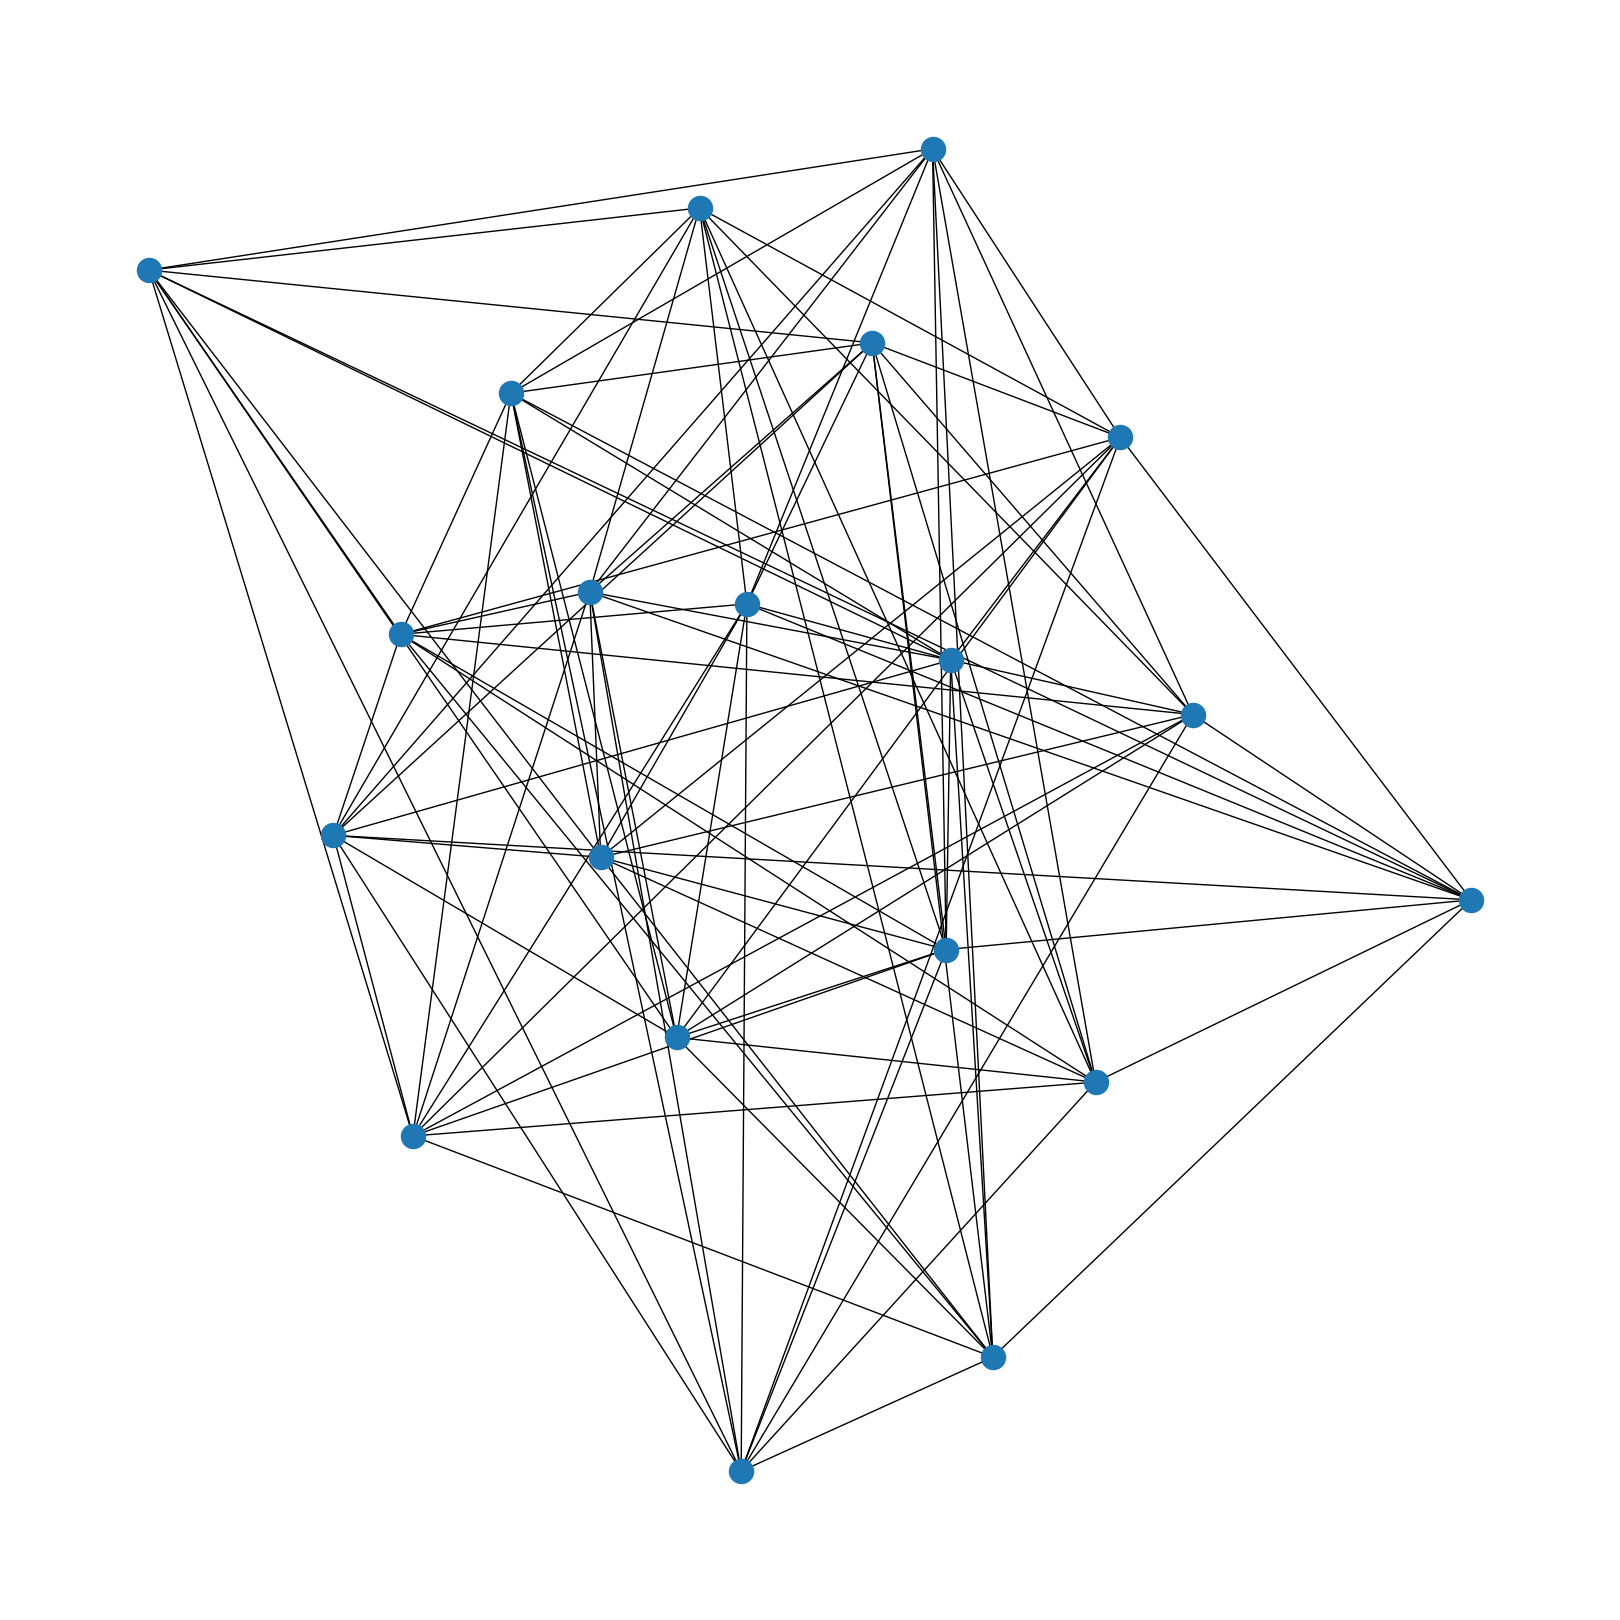

In [109]:
plt.figure(figsize=(16,16))
nx.draw(sim_G)

In [110]:
print(sim_G.nodes())

most_similar

ms_value = similarity_matrix.max(axis=1)
ms_value

y_tick = ['Topic-{}'.format(x+1) for x in range(10)]
x_tick = ['Topic-{}'.format(x+1) for x in range(10)]

sns.set(font_scale=2)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [111]:
# Second VS Third Wave

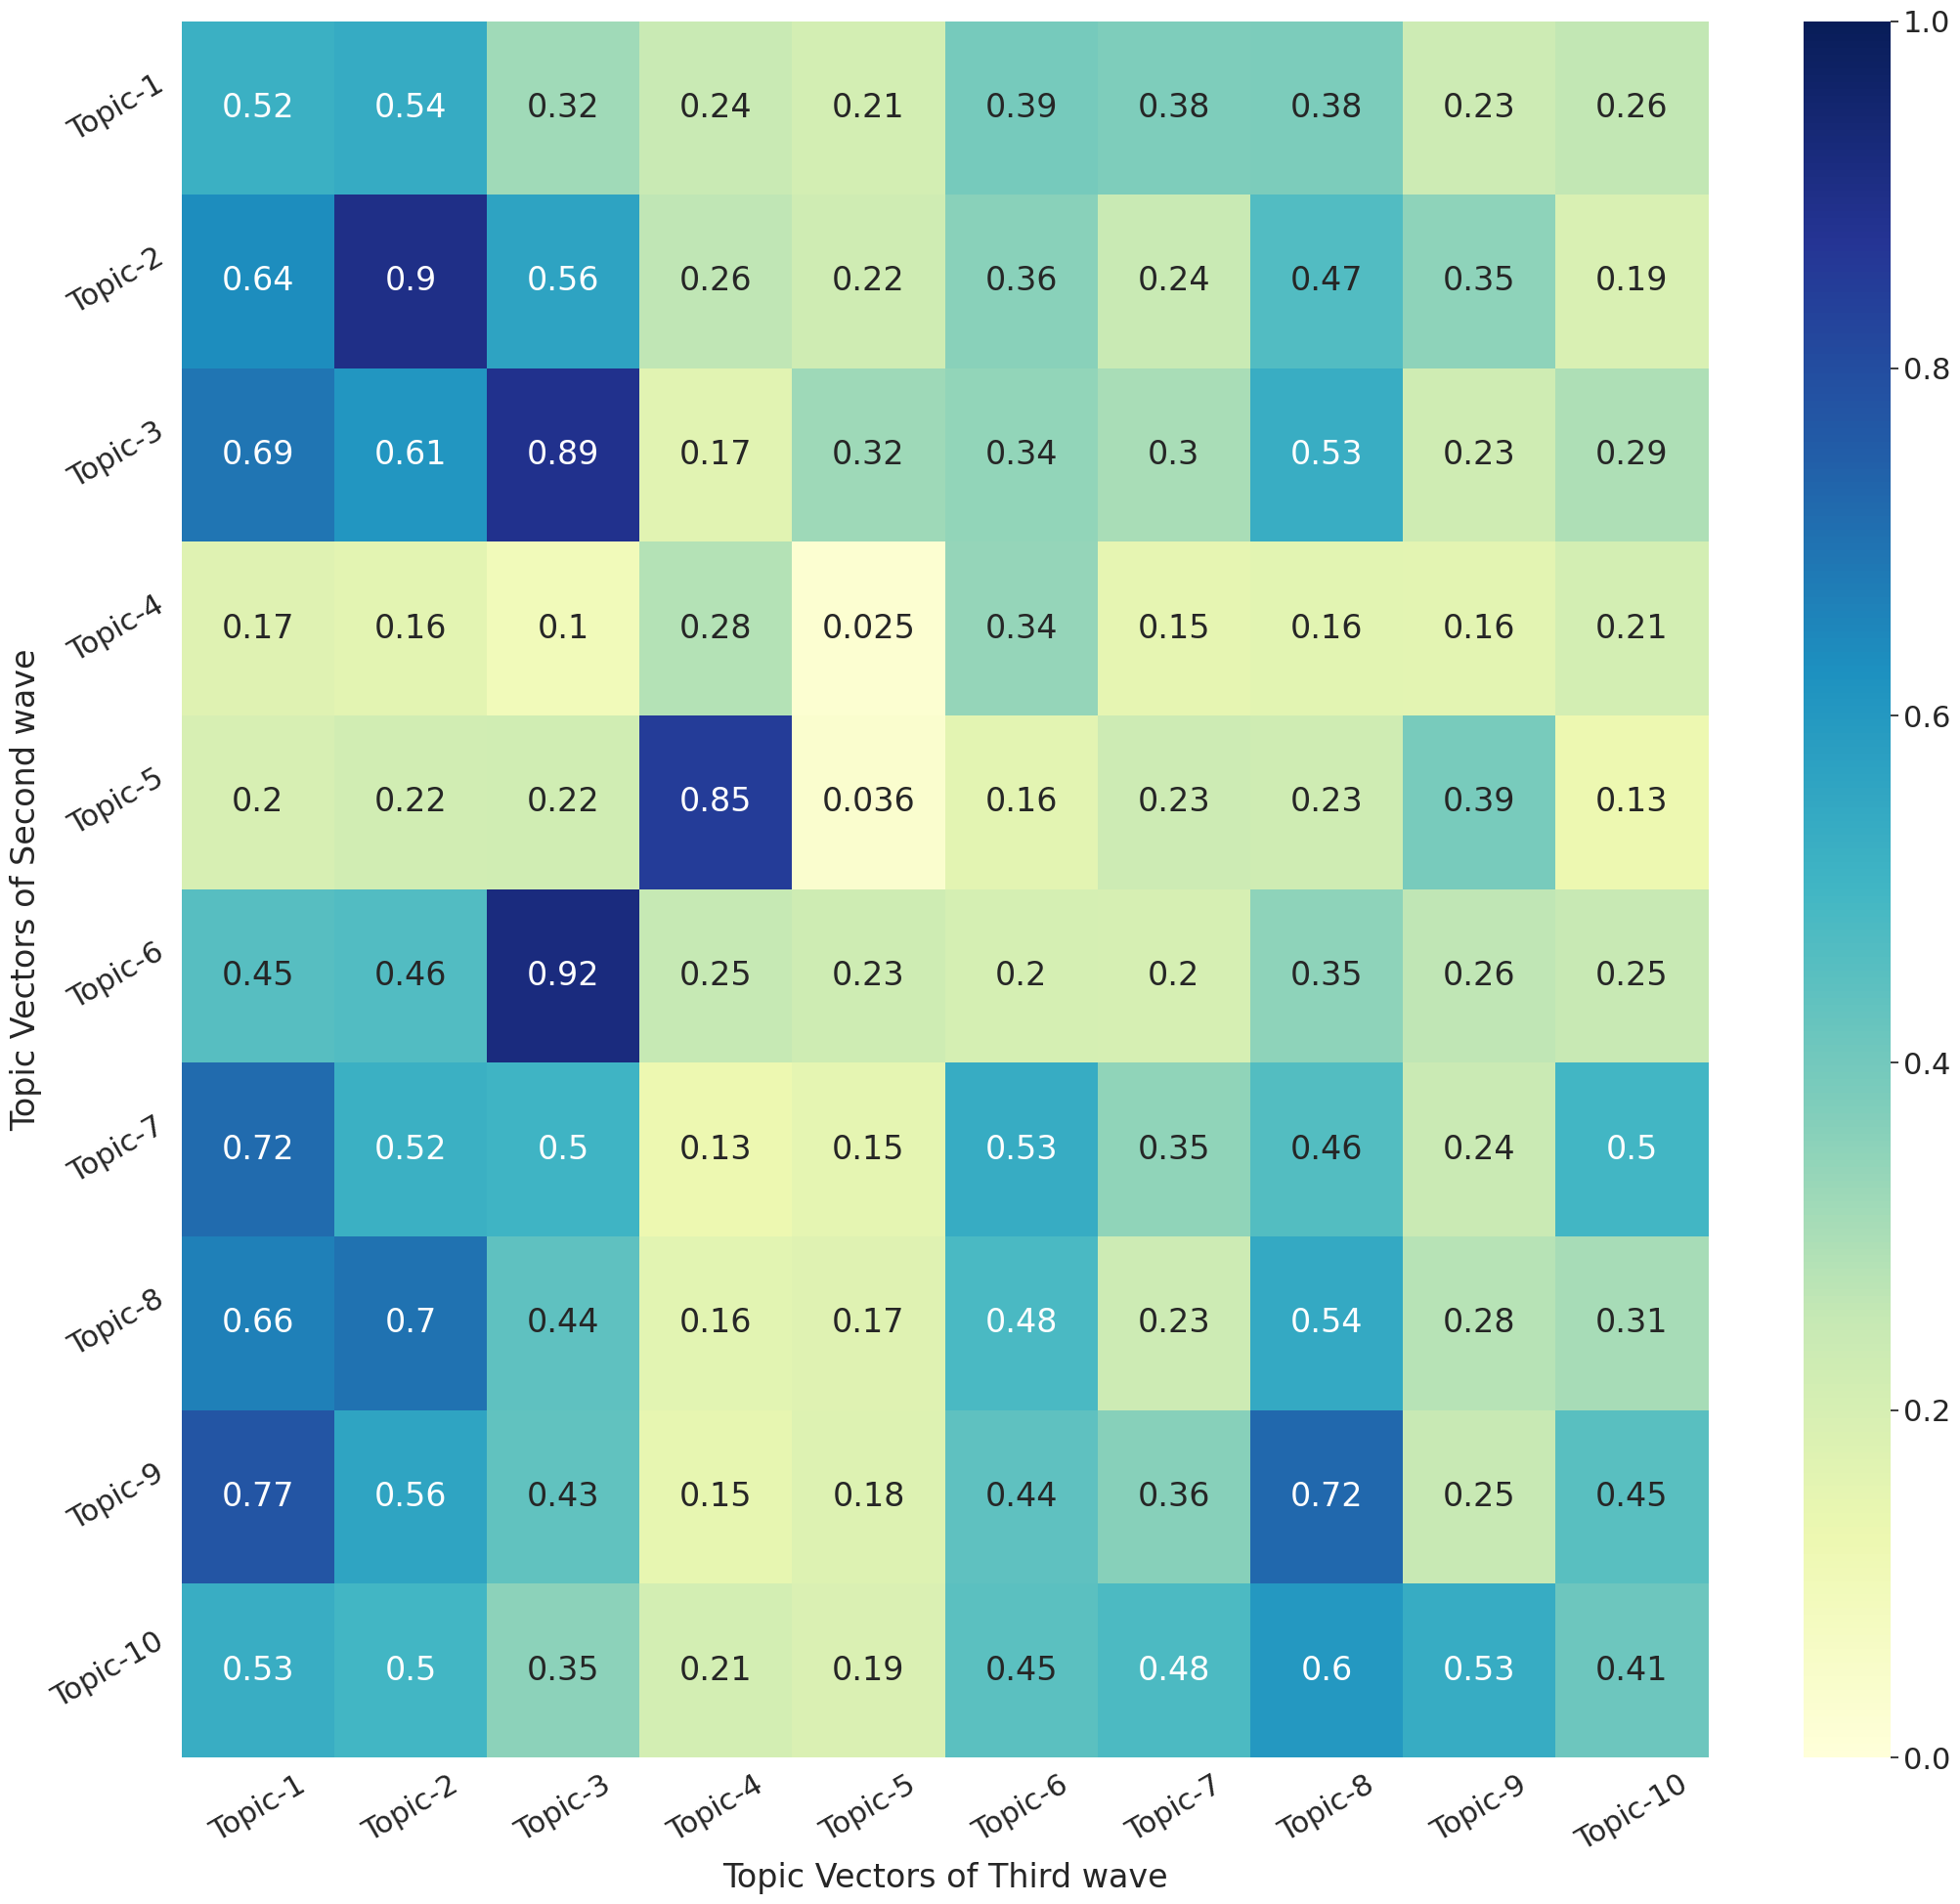

In [112]:
fig = plt.figure(figsize=(22, 20))
cmap = sns.cm.rocket_r
hm = sns.heatmap(similarity_matrix, annot=True, vmin=0, vmax=1, xticklabels=True, yticklabels=True, cmap = "YlGnBu")
_ = hm.set_xticklabels(x_tick, rotation=30)
_ =  hm.set_yticklabels(y_tick, rotation=30)
plt.xlabel("Topic Vectors of Third wave")
plt.ylabel("Topic Vectors of Second wave")
plt.tight_layout()
plt.savefig("heatmap.pdf", bbox_inches = 'tight',dpi = 150, facecolor=fig.get_facecolor(), edgecolor='none')

In [113]:
def get_words(model, num_words = 20, num_topics = 10):
    """
    get n random words from each topics
    """
    reduced_flag = False
    if model.get_num_topics() > num_topics:
      reduced_topic_lists = model.hierarchical_topic_reduction(num_topics = num_topics)
      reduced_flag = True

    topic_words, word_scores, topic_nums = model.get_topics(reduced=reduced_flag)

    return topic_words[:,:num_words], word_scores[:,:num_words], topic_nums

In [114]:
words_secondwave, _, _= get_words(model_second_reduced, 10, model_second_reduced.get_num_topics())
words_thirdwave, _, _ = get_words(model_third_reduced, 10, model_third_reduced.get_num_topics())
words_secondwave

array([['pandemic', 'outbreak', 'sars', ..., 'virus', 'tragedy',
        'vaccinated'],
       ['lockdown', 'lockdowns', 'devastating', ..., 'stay', 'refused',
        'far'],
       ['lockdown', 'bolsonaro', 'brasil', ..., 'brazilians', 'anti',
        'mata'],
       ...,
       ['failure', 'refused', 'yes', ..., 'says', 'could', 'poorly'],
       ['solidarity', 'pandemic', 'tragedy', ..., 'letter', 'love',
        'crisis'],
       ['president', 'trump', 'politics', ..., 'likel', 'america',
        'american']], dtype='<U13')

In [115]:
mstg = []
for x in most_similar:
  mstg.append(words_third[x])
len(mstg)

10

In [116]:
df3 = pd.DataFrame({"Topics of Second Wave":[','.join(list(x)) for x in words_second], "Most Similar topics in Third Wave": [','.join(list(x)) for x in mstg], "Similarity Score": list(ms_value)})
df3

Topics of Second Wave  \
0  brazilians,brazil,brazilian,brasil,pandemic,de...   
1  pandemic,quarantine,outbreak,sars,flu,vaccinat...   
2  vaccinations,vaccine,vaccines,vaccination,vacc...   
3  lockdown,mata,safe,lockdowns,devastating,refus...   
4  coronavirus,lkpqkv,parcial,likel,sars,tmxs,ioq...   
5  vaccine,vaccinations,vaccines,vaccinated,vacci...   
6  biden,trump,politics,president,states,pfizer,s...   
7  catastrophic,devastating,crisis,tragedy,pandem...   
8  outbreak,deaths,news,yesterday,hope,sars,young...   
9  concert,crying,masks,omg,anthem,mask,say,mata,...   

                   Most Similar topics in Third Wave  Similarity Score  
0  pandemic,vaccinated,vaccines,vaccine,risk,spre...          0.536420  
1  pandemic,vaccinated,vaccines,vaccine,risk,spre...          0.898488  
2  vaccines,vaccinated,vaccine,pandemic,coronavir...          0.890032  
3  lockdown,amsterdam,police,twitter,masks,china,...          0.339455  
4  coronavirus,croxb,get,go,suga,spreading,pandem...          0.848239  
5  vaccines,vaccinated,vaccine,pandemic,coronavir...          0.920054  
6  pandemic,vaccinated,masks,vaccines,vaccine,pat...          0.716980  
7  pandemic,vaccinated,vaccines,vaccine,risk,spre...          0.699230  
8  pandemic,vaccinated,masks,vaccines,vaccine,pat...          0.774320  
9  recovery,pandemic,full,hospital,still,twitter,...          0.600447

In [117]:
df3.to_csv('df3.csv')

In [118]:
# First VS Third wave

In [119]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(topic_vectors_firstwave, topic_vectors_thirdwave)
most_similar = similarity_matrix.argmax(axis=1)

ms_value = similarity_matrix.max(axis=1)

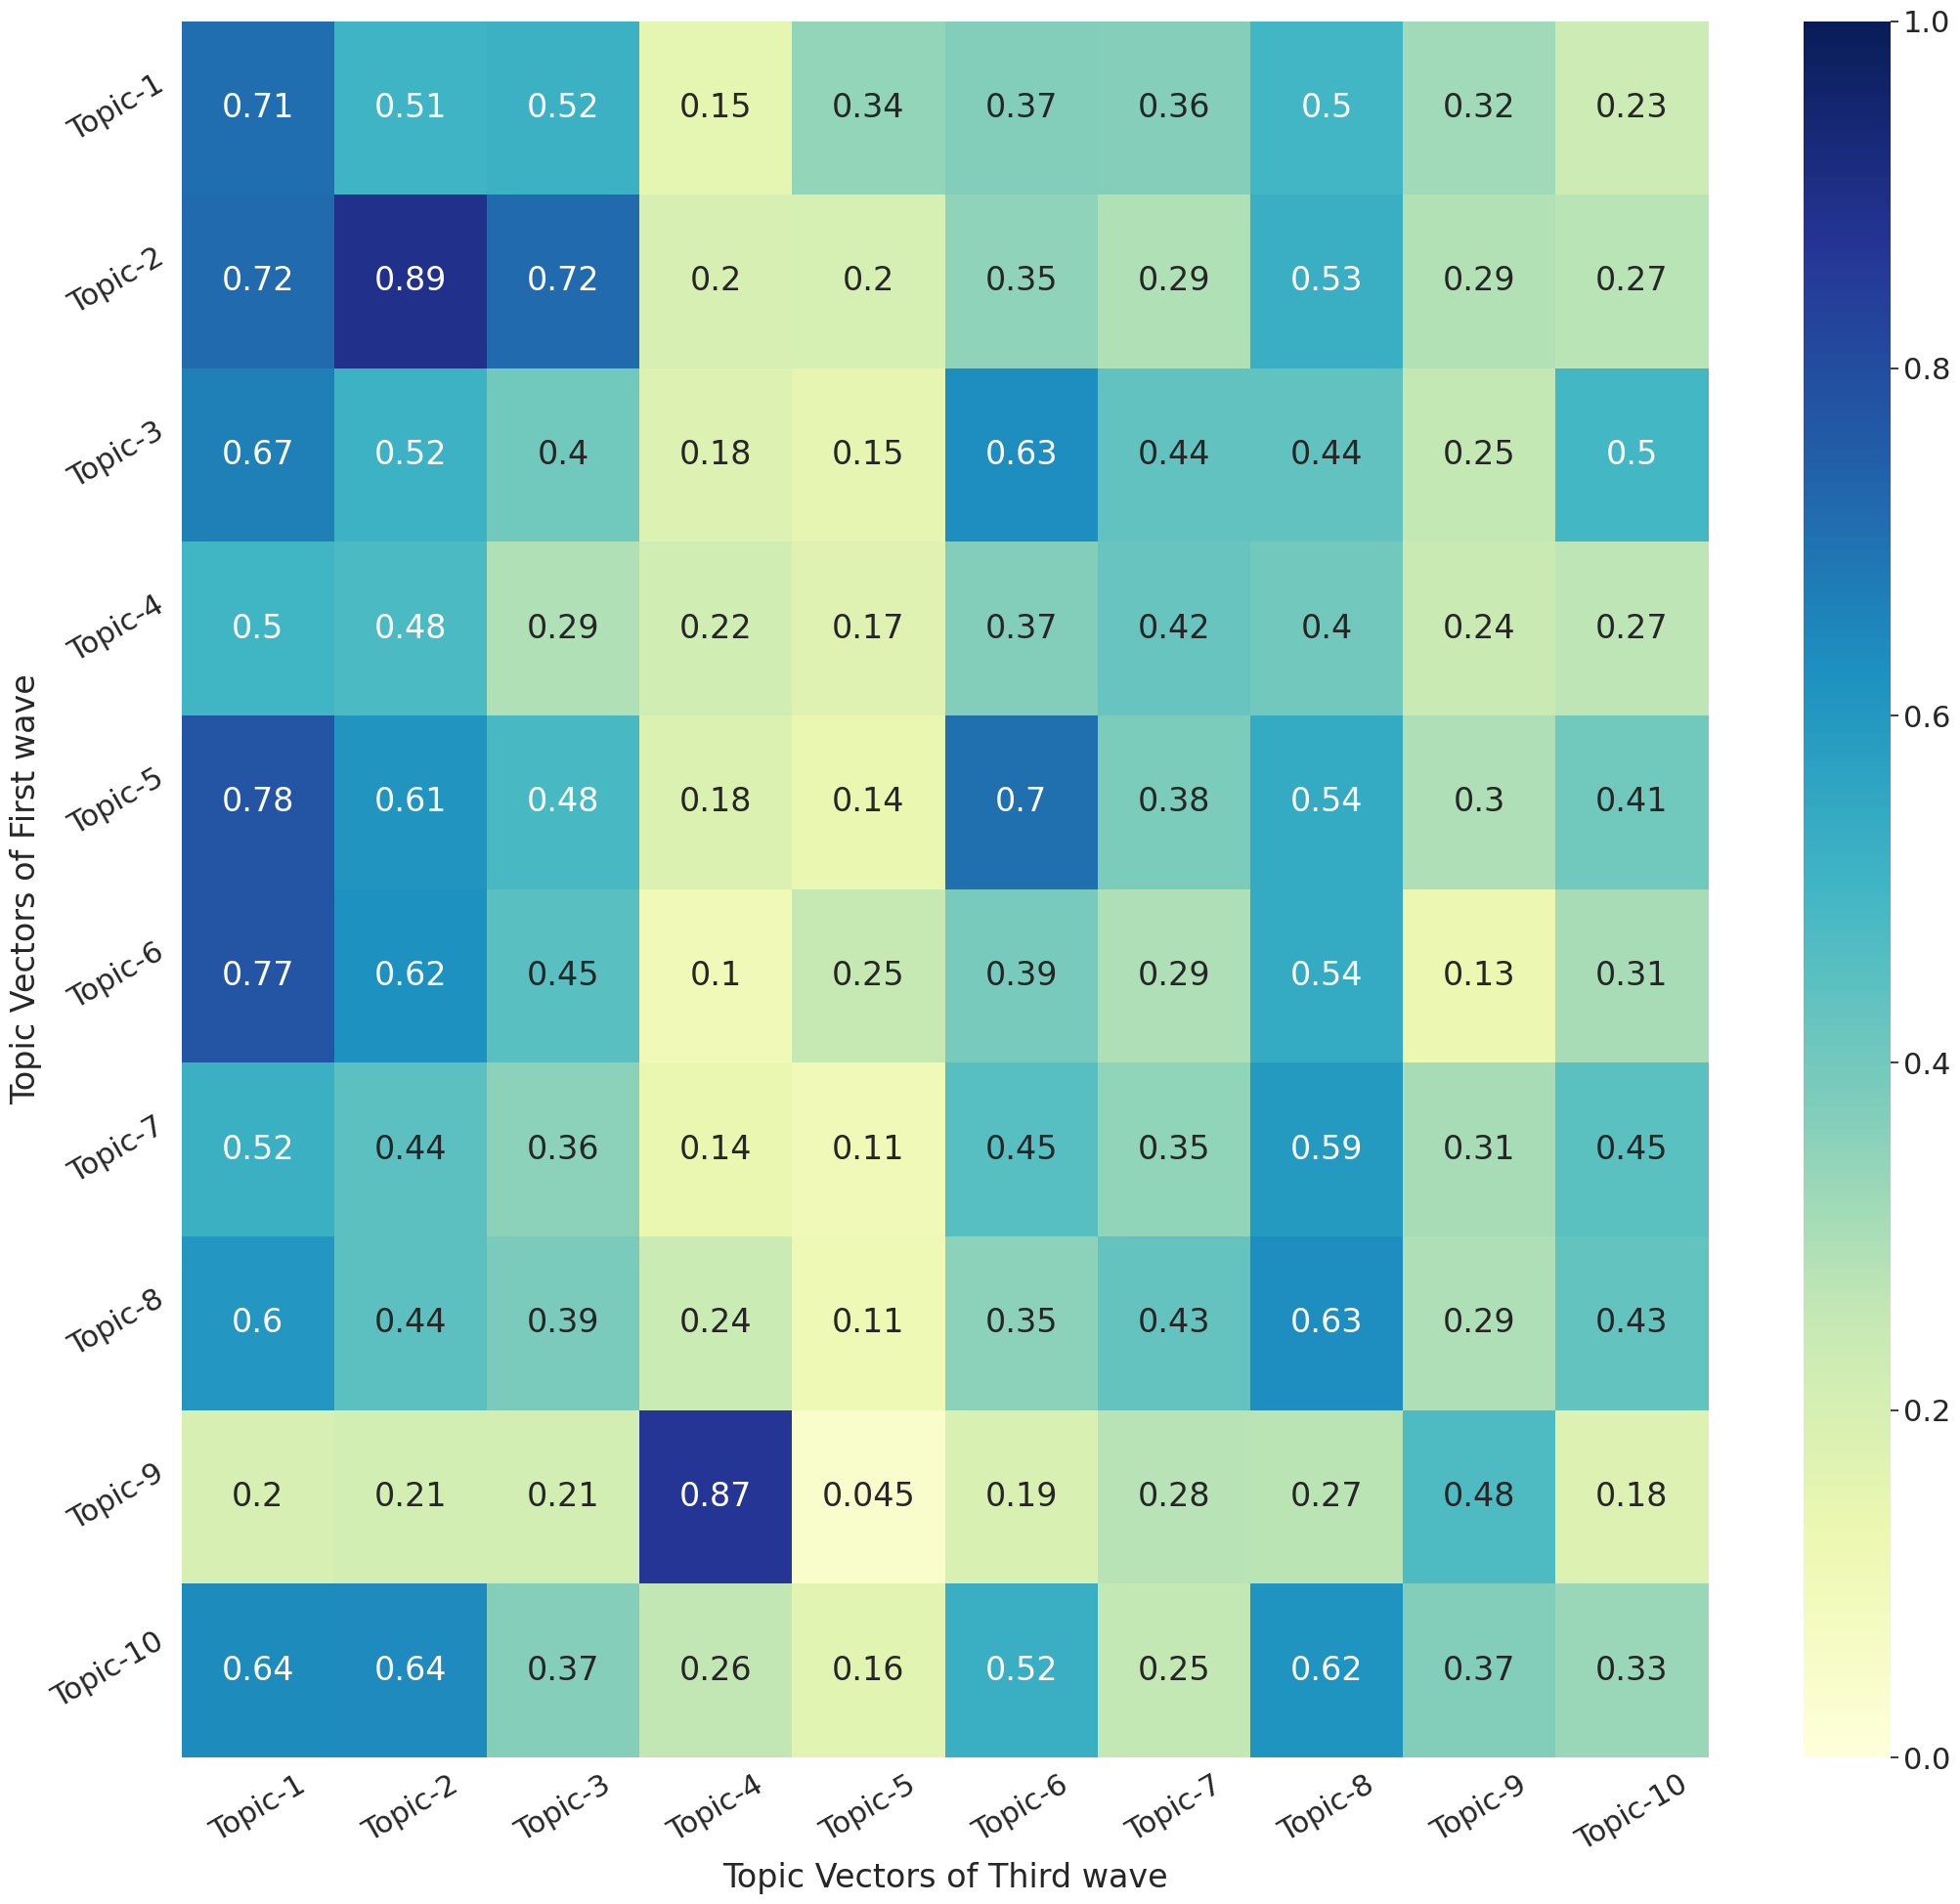

In [120]:
fig = plt.figure(figsize=(22, 20))
cmap = sns.cm.rocket_r
hm = sns.heatmap(similarity_matrix, annot=True, vmin=0, vmax=1, xticklabels=True, yticklabels=True, cmap = "YlGnBu")
_ = hm.set_xticklabels(x_tick, rotation=30)
_ =  hm.set_yticklabels(y_tick, rotation=30)
plt.xlabel("Topic Vectors of Third wave")
plt.ylabel("Topic Vectors of First wave")
plt.tight_layout()
plt.savefig("heatmap.pdf", bbox_inches = 'tight',dpi = 150, facecolor=fig.get_facecolor(), edgecolor='none')

In [121]:
mstg = []
for x in most_similar:
  mstg.append(words_third[x])
len(mstg)

10

In [122]:
df2 = pd.DataFrame({"Topics of First Wave":[','.join(list(x)) for x in words_first], "Most Similar topics in Third Wave": [','.join(list(x)) for x in mstg], "Similarity Score": list(ms_value)})
df2.to_csv('df2.csv')
df2

Topics of First Wave  \
0  sars,doctors,patients,outbreak,hospitals,nine,...   
1  pandemic,outbreak,sars,cdc,vaccine,virus,crisi...   
2  trump,cuomo,uaw,president,illegally,arrested,c...   
3  brazil,brazilian,salvador,usa,cdc,epicenter,me...   
4  lockdown,china,sars,pandemic,wuhan,usa,outbrea...   
5  deaths,death,sars,died,dead,pandemic,cdc,die,r...   
6  amp,team,crisis,fighting,efforts,uaw,thank,nee...   
7  outbreak,update,concludes,study,usa,lockdown,c...   
8  coronavirus,sars,violently,ingenious,outbreak,...   
9  crisis,economy,emergency,poor,pandemic,sars,ba...   

                   Most Similar topics in Third Wave  Similarity Score  
0  pandemic,vaccinated,masks,vaccines,vaccine,pat...          0.707288  
1  pandemic,vaccinated,vaccines,vaccine,risk,spre...          0.891853  
2  pandemic,vaccinated,masks,vaccines,vaccine,pat...          0.665571  
3  pandemic,vaccinated,masks,vaccines,vaccine,pat...          0.503550  
4  pandemic,vaccinated,masks,vaccines,vaccine,pat...          0.775386  
5  pandemic,vaccinated,masks,vaccines,vaccine,pat...          0.773876  
6  recovery,pandemic,full,hospital,still,twitter,...          0.593911  
7  recovery,pandemic,full,hospital,still,twitter,...          0.629345  
8  coronavirus,croxb,get,go,suga,spreading,pandem...          0.868558  
9  pandemic,vaccinated,vaccines,vaccine,risk,spre...          0.642342

In [123]:
# first second wave

In [124]:
topic_vectors_firstwave = model_first_reduced.topic_vectors_reduced
topic_vectors_secondwave = model_second_reduced.topic_vectors_reduced
print(topic_vectors_firstwave.shape, topic_vectors_secondwave.shape)

(10, 512) (10, 512)


In [125]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(topic_vectors_firstwave, topic_vectors_secondwave)
most_similar = similarity_matrix.argmax(axis=1)

ms_value = similarity_matrix.max(axis=1)

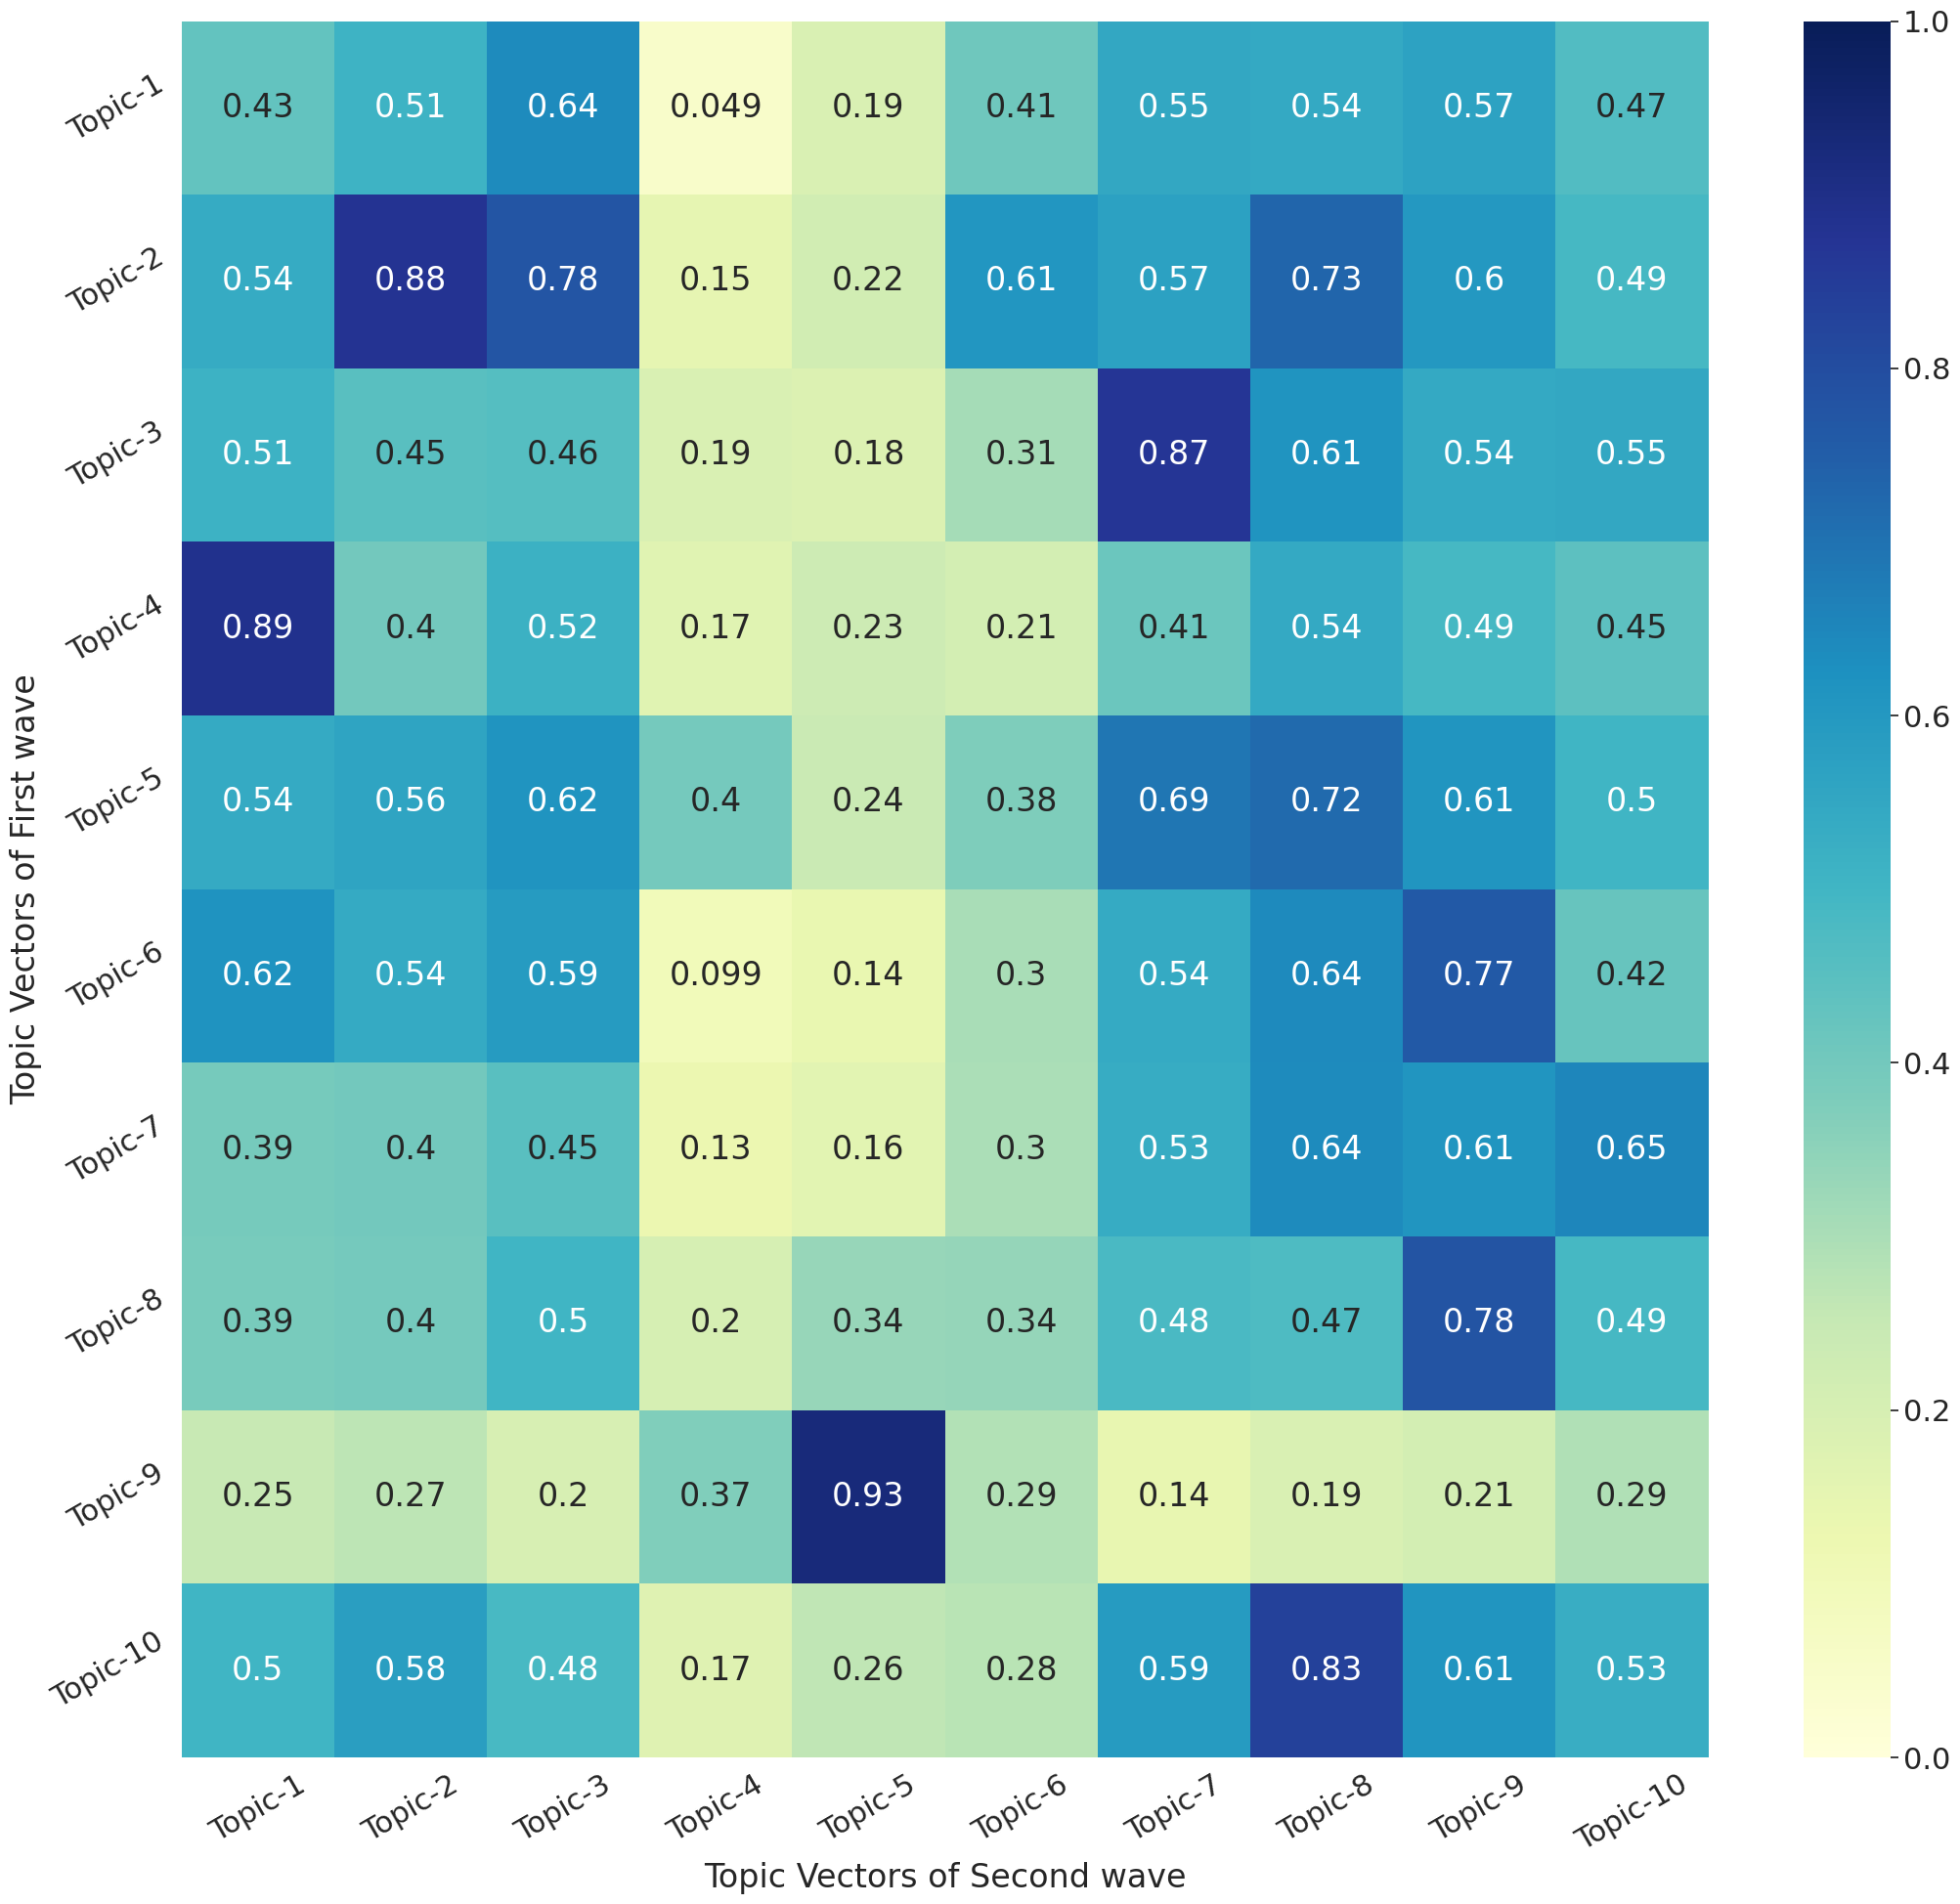

In [126]:
fig = plt.figure(figsize=(22, 20))
cmap = sns.cm.rocket_r
hm = sns.heatmap(similarity_matrix, annot=True, vmin=0, vmax=1, xticklabels=True, yticklabels=True, cmap = "YlGnBu")
_ = hm.set_xticklabels(x_tick, rotation=30)
_ =  hm.set_yticklabels(y_tick, rotation=30)
plt.xlabel("Topic Vectors of Second wave")
plt.ylabel("Topic Vectors of First wave")
plt.tight_layout()
plt.savefig("heatmap.pdf", bbox_inches = 'tight',dpi = 150, facecolor=fig.get_facecolor(), edgecolor='none')

In [127]:
mstg = []
for x in most_similar:
  mstg.append(words_second[x])
len(mstg)

10

In [128]:
df1 = pd.DataFrame({"Topics of First Wave(top 10 words)":[','.join(list(x)) for x in words_first], "Most Similar topics in Second Wave": [','.join(list(x)) for x in mstg], "Similarity Score": list(ms_value)})
df1.to_csv('df1.csv')

In [129]:
df1

Topics of First Wave(top 10 words)  \
0  sars,doctors,patients,outbreak,hospitals,nine,...   
1  pandemic,outbreak,sars,cdc,vaccine,virus,crisi...   
2  trump,cuomo,uaw,president,illegally,arrested,c...   
3  brazil,brazilian,salvador,usa,cdc,epicenter,me...   
4  lockdown,china,sars,pandemic,wuhan,usa,outbrea...   
5  deaths,death,sars,died,dead,pandemic,cdc,die,r...   
6  amp,team,crisis,fighting,efforts,uaw,thank,nee...   
7  outbreak,update,concludes,study,usa,lockdown,c...   
8  coronavirus,sars,violently,ingenious,outbreak,...   
9  crisis,economy,emergency,poor,pandemic,sars,ba...   

                  Most Similar topics in Second Wave  Similarity Score  
0  vaccinations,vaccine,vaccines,vaccination,vacc...          0.636782  
1  pandemic,quarantine,outbreak,sars,flu,vaccinat...          0.878833  
2  biden,trump,politics,president,states,pfizer,s...          0.870799  
3  brazilians,brazil,brazilian,brasil,pandemic,de...          0.889971  
4  catastrophic,devastating,crisis,tragedy,pandem...          0.720502  
5  outbreak,deaths,news,yesterday,hope,sars,young...          0.765266  
6  concert,crying,masks,omg,anthem,mask,say,mata,...          0.651037  
7  outbreak,deaths,news,yesterday,hope,sars,young...          0.780596  
8  coronavirus,lkpqkv,parcial,likel,sars,tmxs,ioq...          0.927643  
9  catastrophic,devastating,crisis,tragedy,pandem...          0.834835

In [130]:
from google.colab import files
df1.to_csv('BRZ_df1.csv')
files.download('BRZ_df1.csv')

df2.to_csv('BRZ_df2.csv')
files.download('BRZ_df2.csv')

df3.to_csv('BRZ_df3.csv')
files.download('BRZ_df3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>